In [1]:
import matplotlib
import os
matplotlib.use('Agg')
%matplotlib inline
from gather_metrics import *
import pandas as pd
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

model_directory = '../../../job_results_small/'
class_dirs = [model_directory+'/random_forest/stage_2/',
              model_directory+'/irv/stage_2/',
              model_directory+'/light_chem/stage_2/',
              model_directory+'/neural_networks/stage_2/',
              model_directory+'/docking/stage_2/',
              model_directory+'/baseline/stage_2/']
k = 5

In [2]:
#setup gather matrix
gather_df = gather_dir_metrics(class_dirs[0], 1)     
gather_df = gather_df.append(gather_dir_metrics(class_dirs[1], 1))   
gather_df = gather_df.append(gather_dir_metrics(class_dirs[2], 1))   
gather_df = gather_df.append(gather_dir_metrics(class_dirs[3], 1))
gather_df = gather_df.append(gather_dir_metrics(class_dirs[4], 1))
gather_df = gather_df.append(gather_dir_metrics(class_dirs[5], 1))

col_indices = list(range(10)) + list(range(15, 20)) + list(range(25, 65)) + list(range(145, 149)) + list(range(150, 183))
col_indices = [i for i in col_indices if 'Mean' not in gather_df.columns[i] and 'Median' not in gather_df.columns[i]]
col_indices = [i for i in col_indices if 'PriA-SSB AS' in gather_df.columns[i]]
metric_names = list(gather_df.columns.values[col_indices])

gather_df = gather_df[metric_names]
gather_df = gather_df.dropna(axis=0)

#setup comparison matrix and overlaps
mm_comp_dicts = get_mean_median_comps(gather_df, col_indices=[i for i in range(len(metric_names))])
agg_comp_dict = get_agg_comp(mm_comp_dicts, None, mean_w=1, median_w=0, tukey_w=0)
overlapping_models = get_overlap(agg_comp_dict, N=1)

C:\Users\Moeman\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3858: RuntimeWarning: Invalid value encountered in median for 185 results
  r = func(a, **kwargs)
C:\Users\Moeman\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3858: RuntimeWarning: Invalid value encountered in median for 112 results
  r = func(a, **kwargs)


---
## Model Ordering by Metric (Best-to-Worst)
Shows table with model-winscore pairs in the cells.

In [3]:
ordered_df = get_model_ordering(agg_comp_dict, metric_names)
ordered_df

,ROC AUC PriA-SSB AS,BEDROC AUC PriA-SSB AS,PR auc.integral PriA-SSB AS,NEF_0.1 % PriA-SSB AS,NEF_0.15 % PriA-SSB AS,NEF_0.5 % PriA-SSB AS,NEF_1 % PriA-SSB AS,NEF_2 % PriA-SSB AS,NEF_5 % PriA-SSB AS,NEF_10 % PriA-SSB AS,NEF_20 % PriA-SSB AS,NEF AUC PriA-SSB AS,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
0,"CBF_f, 1.0","CBF_c, 1.0","CBF_c, 1.0","CBF_a, 1.0","CBF_c, 1.0","CBF_b, 1.0","CBF_b, 1.0","CBF_b, 1.0","CBF_b, 1.0","CBF_a, 1.0","CBF_a, 1.0","CBF_a, 1.0","CBF_f, 1.0","CBF_b, 1.0","CBF_b, 1.0","CBF_c, 1.0","CBF_a, 1.0","CBF_d, 1.0","CBF_e, 1.0"
1,"CBF_e, 2.0","CBF_b, 2.0","CBF_b, 2.0","CBF_d, 1.0","RandomForest_g, 1.0","CBF_f, 2.0","CBF_c, 2.0","CBF_c, 2.0","CBF_a, 2.0","CBF_d, 2.0","CBF_d, 1.0","CBF_e, 2.0","CBF_b, 1.0","CBF_c, 2.0","CBF_c, 2.0","CBF_b, 2.0","CBF_d, 1.0","CBF_a, 2.0","CBF_f, 1.0"
2,"CBF_d, 3.0","CBF_f, 3.0","CBF_f, 3.0","SingleClassification_b, 1.0","RandomForest_h, 3.0","CBF_e, 3.0","CBF_f, 2.0","CBF_e, 2.0","CBF_c, 2.0","CBF_c, 2.0","CBF_e, 3.0","CBF_b, 3.0","CBF_e, 3.0","CBF_f, 2.0","CBF_e, 3.0","CBF_f, 3.0","CBF_c, 1.0","CBF_e, 2.0","CBF_a, 3.0"
3,"CBF_c, 4.0","CBF_e, 4.0","CBF_a, 4.0","CBF_c, 1.0","CBF_a, 4.0","CBF_c, 4.0","CBF_a, 4.0","CBF_f, 4.0","CBF_e, 2.0","CBF_f, 2.0","CBF_f, 4.0","CBF_f, 4.0","CBF_c, 4.0","CBF_a, 4.0","CBF_f, 4.0","CBF_e, 4.0","CBF_f, 1.0","CBF_f, 4.0","CBF_c, 4.0"
4,"CBF_a, 5.0","CBF_d, 5.0","CBF_d, 5.0","RandomForest_h, 1.0","SingleClassification_b, 4.0","CBF_d, 4.0","CBF_e, 4.0","CBF_a, 5.0","CBF_f, 2.0","CBF_e, 2.0","CBF_b, 5.0","CBF_c, 5.0","CBF_a, 5.0","CBF_e, 4.0","CBF_a, 5.0","CBF_a, 5.0","CBF_e, 1.0","CBF_b, 5.0","CBF_d, 4.0"
5,"CBF_b, 6.0","CBF_a, 6.0","CBF_e, 6.0","RandomForest_g, 1.0","CBF_d, 6.0","CBF_a, 6.0","CBF_d, 6.0","CBF_d, 6.0","CBF_d, 6.0","CBF_b, 6.0","CBF_c, 5.0","CBF_d, 6.0","CBF_d, 6.0","CBF_d, 6.0","CBF_d, 6.0","CBF_d, 6.0","CBF_b, 6.0","CBF_c, 5.0","CBF_b, 6.0"
6,"SingleRegression_a, 7.0","SingleRegression_a, 7.0","RandomForest_h, 7.0","CBF_b, 1.0","CBF_b, 6.0","RandomForest_h, 7.0","RandomForest_h, 7.0","SingleRegression_a, 7.0","SingleRegression_a, 7.0","SingleRegression_a, 7.0","SingleRegression_a, 7.0","SingleRegression_a, 7.0","RandomForest_h, 7.0","RandomForest_h, 7.0","SingleRegression_a, 7.0","SingleRegression_b, 7.0","SingleRegression_a, 7.0","SingleRegression_a, 7.0","SingleRegression_b, 7.0"
7,"SingleRegression_b, 8.0","SingleRegression_b, 8.0","RandomForest_g, 8.0","RandomForest_f, 8.0","CBF_f, 8.0","RandomForest_g, 7.0","RandomForest_g, 8.0","RandomForest_h, 8.0","SingleRegression_b, 7.0","SingleRegression_b, 8.0","SingleRegression_b, 8.0","SingleRegression_b, 8.0","RandomForest_g, 7.0","RandomForest_g, 8.0","RandomForest_h, 8.0","SingleRegression_a, 8.0","SingleRegression_b, 8.0","SingleRegression_b, 8.0","SingleRegression_a, 8.0"
8,"RandomForest_h, 9.0","RandomForest_g, 9.0","RandomForest_d, 9.0","MultiClassification_a, 8.0","RandomForest_c, 9.0","RandomForest_a, 9.0","RandomForest_e, 9.0","RandomForest_g, 8.0","IRV_e, 9.0","RandomForest_h, 9.0","RandomForest_d, 9.0","RandomForest_h, 9.0","RandomForest_e, 9.0","RandomForest_e, 9.0","RandomForest_g, 8.0","RandomForest_e, 9.0","RandomForest_d, 9.0","RandomForest_d, 9.0","RandomForest_h, 9.0"
9,"RandomForest_d, 10.0","RandomForest_h, 10.0","RandomForest_e, 10.0","RandomForest_b, 10.0","MultiClassification_a, 9.0","RandomForest_b, 10.0","RandomForest_c, 9.0","SingleRegression_b, 8.0","RandomForest_g, 10.0","RandomForest_d, 10.0","RandomForest_c, 9.0","RandomForest_g, 10.0","RandomForest_d, 9.0","RandomForest_c, 9.0","SingleRegression_b, 8.0","RandomForest_a, 10.0","RandomForest_g, 9.0","RandomForest_c, 9.0","baseline, 10.0"


---
## Metrics Most Similar to N-Hits

In [4]:
get_similar_to_nhits(agg_comp_dict, metric_names[:-7], metric_names[-7:])

,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
0,NEF_0.5 %,NEF_1 %,NEF_2 %,NEF_5 %,NEF_10 %,NEF_20 %,ROC AUC
1,NEF_1 %,NEF_0.5 %,NEF_5 %,NEF_2 %,BEDROC AUC,ROC AUC,NEF_20 %
2,PR auc.integral,NEF_2 %,"BEDROC AUC, NEF_1 %","BEDROC AUC, NEF_10 %",NEF AUC,NEF_10 %,NEF_10 %
3,NEF_2 %,PR auc.integral,"NEF_10 %, NEF AUC",NEF AUC,ROC AUC,NEF AUC,NEF AUC
4,NEF_0.1 %,"NEF_0.1 %, NEF_5 %",NEF_0.5 %,NEF_1 %,NEF_5 %,BEDROC AUC,BEDROC AUC
5,NEF_0.15 %,BEDROC AUC,NEF_20 %,NEF_20 %,NEF_20 %,NEF_2 %,"NEF_2 %, NEF_5 %"
6,"BEDROC AUC, NEF_5 %",NEF_0.15 %,PR auc.integral,NEF_0.5 %,NEF_2 %,PR auc.integral,PR auc.integral
7,NEF AUC,NEF AUC,ROC AUC,ROC AUC,PR auc.integral,NEF_5 %,NEF_0.1 %
8,NEF_10 %,NEF_10 %,NEF_0.1 %,PR auc.integral,"NEF_0.5 %, NEF_1 %",NEF_0.1 %,NEF_1 %
9,NEF_20 %,NEF_20 %,NEF_0.15 %,NEF_0.1 %,NEF_0.1 %,NEF_1 %,"NEF_0.15 %, NEF_0.5 %"


---
## Overlapping top 1 models over all metrics

In [5]:
overlapping_models

,overlap_perc
CBF_b,0.421053
CBF_c,0.315789
CBF_a,0.263158
CBF_d,0.210526
CBF_f,0.210526
CBF_e,0.105263
RandomForest_g,0.105263
SingleClassification_b,0.052632
RandomForest_h,0.052632


In [6]:
get_overlap(agg_comp_dict, N=5)

,overlap_perc
CBF_c,1.000000
CBF_a,0.894737
CBF_f,0.894737
CBF_e,0.842105
CBF_b,0.736842
CBF_d,0.526316
RandomForest_h,0.105263
RandomForest_g,0.105263
SingleClassification_b,0.105263


## Spearman's Rank-order correlation coefficient 

In [7]:
spearman_df, ordered_spearman_df = get_spearman_r(agg_comp_dict, metric_names[:-7], metric_names[-7:])

In [8]:
ordered_spearman_df

,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
0,NEF_0.5 %,NEF_1 %,NEF_2 %,NEF_5 %,NEF_10 %,NEF_20 %,ROC AUC
1,NEF_1 %,NEF_0.5 %,BEDROC AUC,NEF_2 %,NEF AUC,ROC AUC,NEF_20 %
2,PR auc.integral,NEF_2 %,NEF_5 %,BEDROC AUC,BEDROC AUC,NEF AUC,NEF AUC
3,NEF_2 %,PR auc.integral,NEF AUC,NEF AUC,ROC AUC,BEDROC AUC,BEDROC AUC
4,NEF_0.15 %,BEDROC AUC,NEF_10 %,NEF_10 %,NEF_20 %,NEF_10 %,NEF_10 %
5,NEF AUC,NEF AUC,NEF_1 %,ROC AUC,NEF_5 %,PR auc.integral,PR auc.integral
6,BEDROC AUC,NEF_10 %,PR auc.integral,PR auc.integral,PR auc.integral,NEF_2 %,NEF_5 %
7,NEF_10 %,NEF_5 %,ROC AUC,NEF_20 %,NEF_2 %,NEF_5 %,NEF_2 %
8,NEF_5 %,NEF_20 %,NEF_0.5 %,NEF_1 %,NEF_1 %,NEF_1 %,NEF_1 %
9,NEF_20 %,ROC AUC,NEF_20 %,NEF_0.5 %,NEF_0.5 %,NEF_0.5 %,NEF_0.5 %


In [9]:
spearman_df

,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
ROC AUC,0.900903,0.919079,0.949537,0.949015,0.980243,0.986012,0.986653
BEDROC AUC,0.932787,0.950149,0.971092,0.968095,0.993307,0.982930,0.973669
PR auc.integral,0.953580,0.957794,0.952059,0.940653,0.967748,0.964684,0.948514
NEF_0.1 %,0.910026,0.888729,0.858821,0.827730,0.861234,0.847141,0.832920
NEF_0.15 %,0.936968,0.906488,0.873469,0.837845,0.869693,0.854323,0.837155
NEF_0.5 %,0.988978,0.977317,0.945926,0.918939,0.912793,0.897033,0.877636
NEF_1 %,0.978246,0.999388,0.959938,0.932403,0.934520,0.924879,0.905048
NEF_2 %,0.947349,0.961355,0.999510,0.973116,0.958397,0.946215,0.935553
NEF_5 %,0.917496,0.934324,0.969443,0.992354,0.972524,0.939230,0.939190
NEF_10 %,0.924635,0.940287,0.962226,0.963918,0.998741,0.978733,0.970109


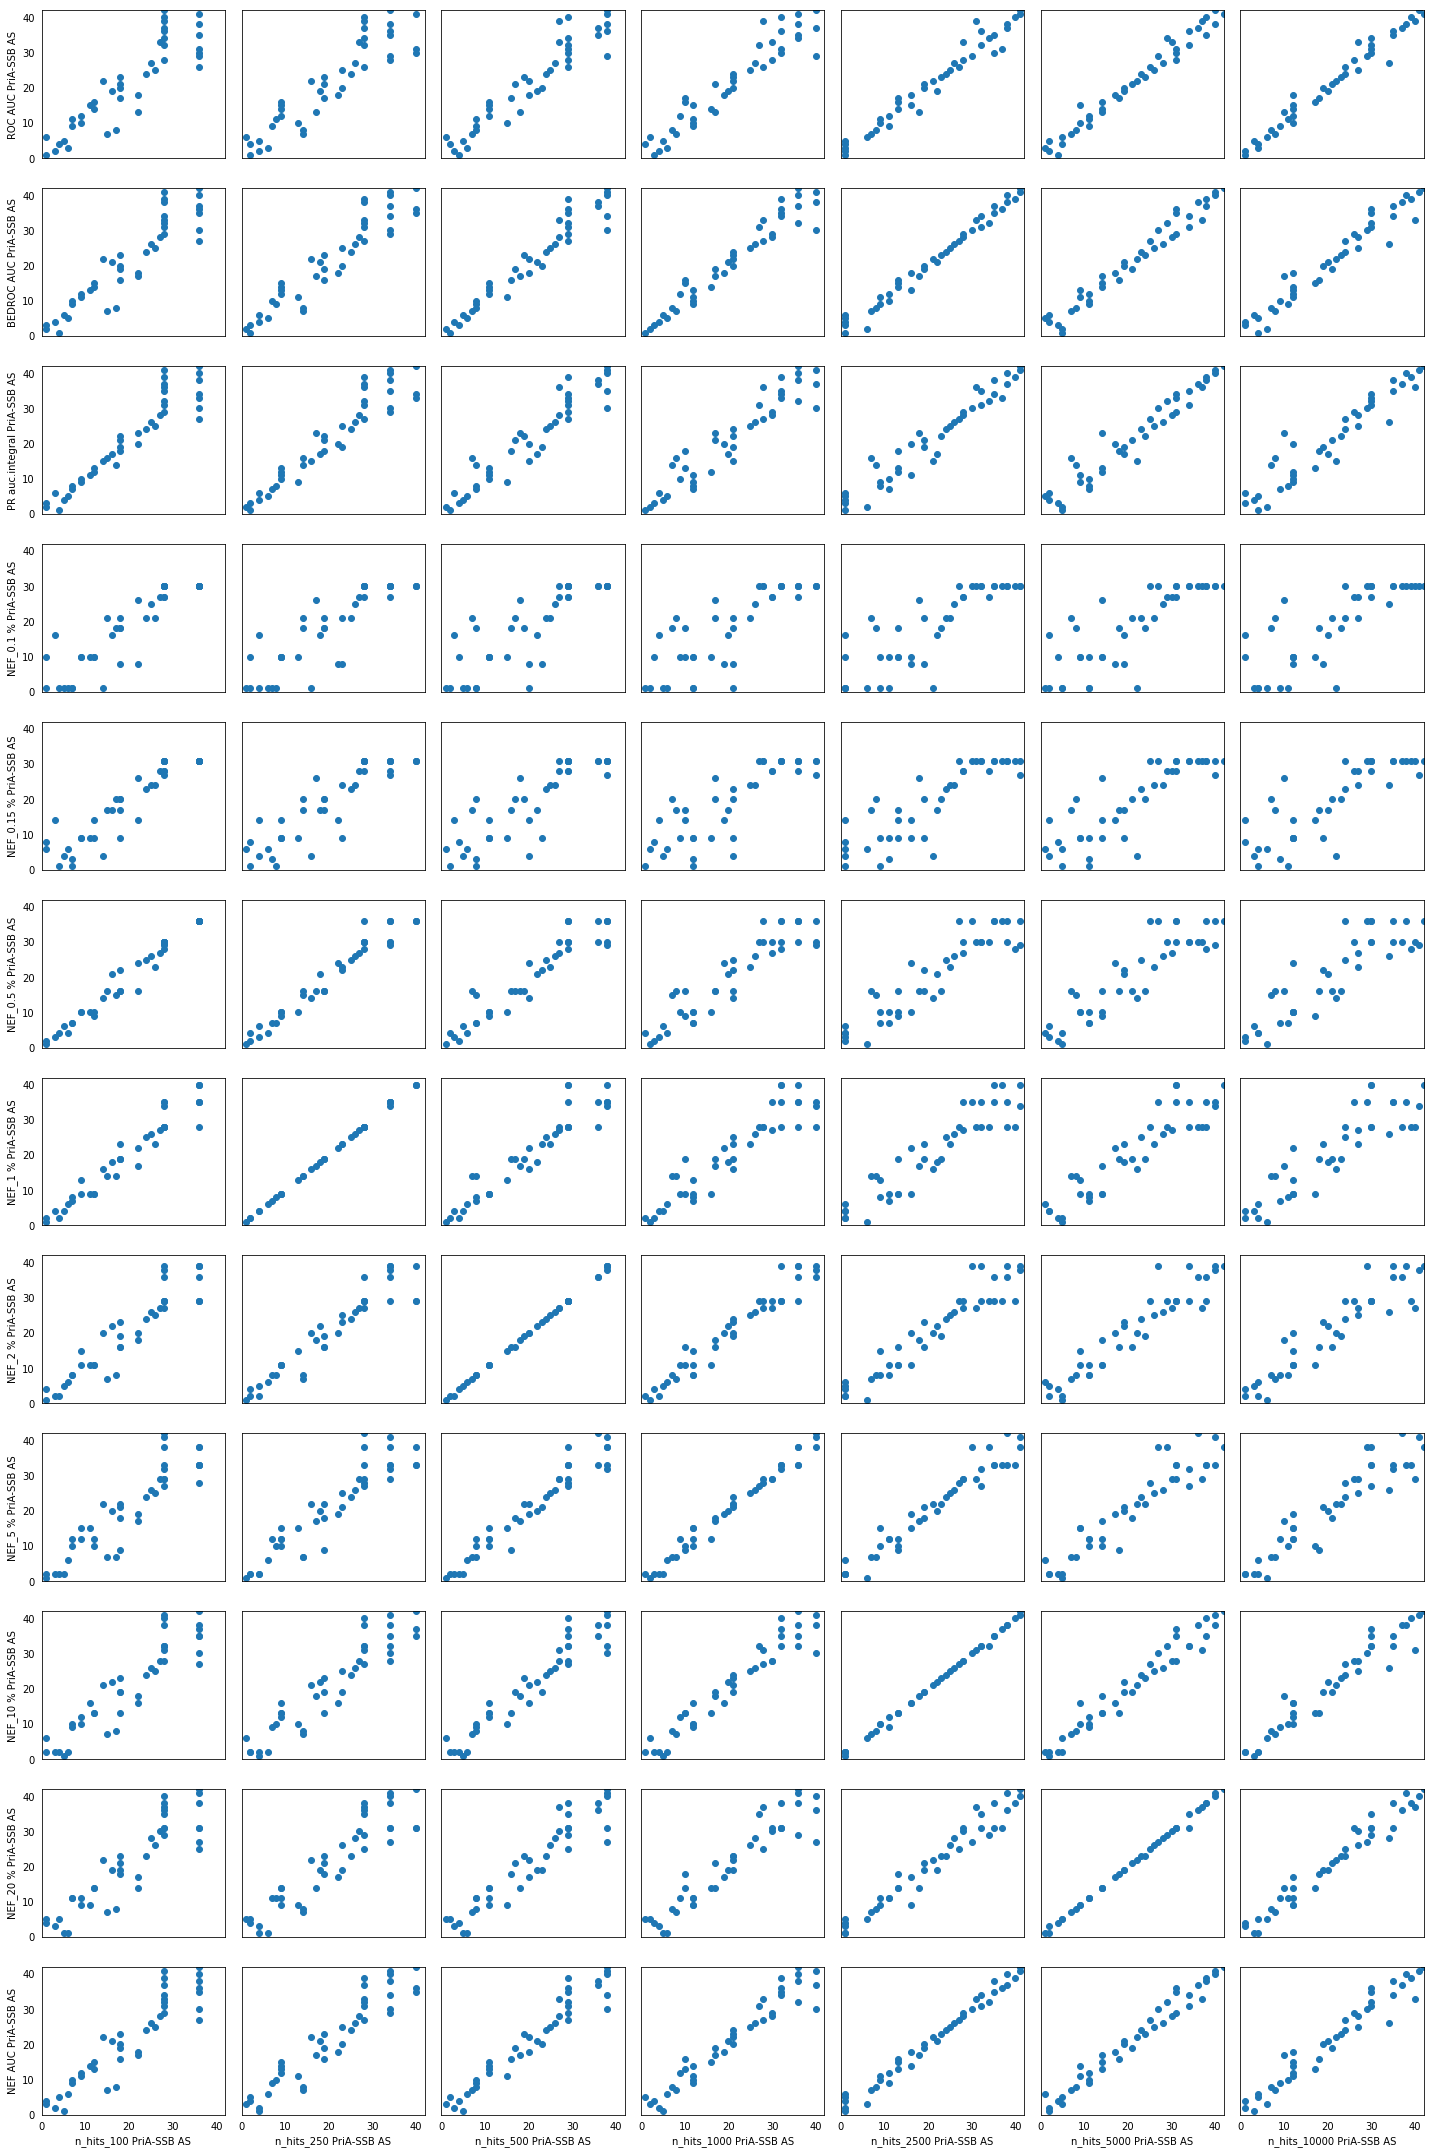

In [10]:
labels=['PriA-SSB AS']
matplotlib.rcParams.update({'font.size': 10})
if not os.path.exists('./cv_ps_figures/ps_scatter_plots_nhits/'):
    os.makedirs('./cv_ps_figures/ps_scatter_plots_nhits/')
for l in labels:
    curr_metrics = [m for m in metric_names[:-7] if l in m]
    curr_hits = [m for m in metric_names[-7:] if l in m]
    file_name = './cv_ps_figures/ps_scatter_plots_nhits/' + l.replace(' ', '_') + '.png'
    plot_scatter_nhits_alt(agg_comp_dict, curr_metrics, curr_hits, file_name, figsize=(20,30))

## Metric Scores and Plots

In [11]:
get_model_ordering_mscores(gather_df, metric_names)

,ROC AUC PriA-SSB AS,BEDROC AUC PriA-SSB AS,PR auc.integral PriA-SSB AS,NEF_0.1 % PriA-SSB AS,NEF_0.15 % PriA-SSB AS,NEF_0.5 % PriA-SSB AS,NEF_1 % PriA-SSB AS,NEF_2 % PriA-SSB AS,NEF_5 % PriA-SSB AS,NEF_10 % PriA-SSB AS,NEF_20 % PriA-SSB AS,NEF AUC PriA-SSB AS,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
0,"CBF_f, 0.931948421361","CBF_c, 0.746056105921","CBF_c, 0.32957825346","SingleClassification_b, 0.56","CBF_c, 0.594594594595","CBF_b, 0.535714285714","CBF_b, 0.595238095238","CBF_b, 0.654761904762","CBF_b, 0.77380952381","CBF_a, 0.821428571429","CBF_a, 0.880952380952","CBF_a, 0.774498262548","CBF_b, 40.0","CBF_b, 50.0","CBF_b, 55.0","CBF_c, 63.0","CBF_c, 68.0","CBF_d, 74.0","CBF_f, 81.0"
1,"CBF_e, 0.93115886561","CBF_b, 0.742502129111","CBF_b, 0.319079676143","RandomForest_g, 0.56","RandomForest_g, 0.594594594595","CBF_f, 0.52380952381","CBF_c, 0.571428571429","CBF_c, 0.642857142857","CBF_c, 0.75","CBF_e, 0.809523809524","CBF_d, 0.880952380952","CBF_e, 0.77133024453","CBF_f, 40.0","CBF_c, 48.0","CBF_c, 54.0","CBF_b, 62.0","CBF_e, 68.0","CBF_a, 73.0","CBF_e, 81.0"
2,"CBF_d, 0.92881240609","CBF_f, 0.739858715779","CBF_f, 0.302323447507","RandomForest_h, 0.56","RandomForest_h, 0.567567567568","CBF_e, 0.5","CBF_f, 0.571428571429","CBF_e, 0.642857142857","CBF_a, 0.75","CBF_d, 0.809523809524","CBF_e, 0.869047619048","CBF_b, 0.770195254183","CBF_e, 39.0","CBF_f, 48.0","CBF_e, 53.0","CBF_f, 61.0","CBF_d, 68.0","CBF_e, 73.0","CBF_a, 79.0"
3,"CBF_c, 0.927980797399","CBF_e, 0.738965023567","CBF_a, 0.295053847537","CBF_c, 0.56","SingleClassification_b, 0.540540540541","CBF_d, 0.47619047619","CBF_a, 0.559523809524","CBF_f, 0.630952380952","CBF_f, 0.75","CBF_f, 0.809523809524","CBF_f, 0.857142857143","CBF_f, 0.768706499356","CBF_c, 36.0","CBF_a, 47.0","CBF_f, 52.0","CBF_e, 60.0","CBF_f, 68.0","CBF_f, 72.0","CBF_c, 78.0"
4,"CBF_a, 0.924892977632","CBF_d, 0.732453300034","CBF_d, 0.284595650594","CBF_a, 0.56","CBF_a, 0.540540540541","CBF_c, 0.47619047619","CBF_e, 0.559523809524","CBF_a, 0.595238095238","CBF_e, 0.75","CBF_c, 0.809523809524","CBF_c, 0.845238095238","CBF_c, 0.76736023166","CBF_a, 34.0","CBF_e, 47.0","CBF_a, 50.0","CBF_a, 59.0","CBF_a, 68.0","CBF_c, 71.0","CBF_d, 78.0"
5,"CBF_b, 0.916958674718","CBF_a, 0.732262799405","CBF_e, 0.278486832547","CBF_b, 0.56","CBF_d, 0.513513513514","CBF_a, 0.452380952381","CBF_d, 0.535714285714","CBF_d, 0.583333333333","CBF_d, 0.714285714286","CBF_b, 0.797619047619","CBF_b, 0.845238095238","CBF_d, 0.761043468468","CBF_d, 33.0","CBF_d, 45.0","CBF_d, 49.0","CBF_d, 58.0","CBF_b, 67.0","CBF_b, 71.0","CBF_b, 77.0"
6,"SingleRegression_a, 0.8899139096","SingleRegression_a, 0.653182080646","RandomForest_h, 0.248639521591","CBF_d, 0.56","CBF_b, 0.513513513514","RandomForest_g, 0.404761904762","RandomForest_h, 0.488095238095","SingleRegression_a, 0.559523809524","SingleRegression_a, 0.642857142857","SingleRegression_a, 0.714285714286","SingleRegression_a, 0.797619047619","SingleRegression_a, 0.677951608752","RandomForest_g, 32.0","RandomForest_h, 41.0","SingleRegression_a, 47.0","SingleRegression_b, 54.0","SingleRegression_a, 60.0","SingleRegression_a, 67.0","SingleRegression_b, 76.0"
7,"SingleRegression_b, 0.882700649222","SingleRegression_b, 0.636670655301","RandomForest_g, 0.247225097218","RandomForest_f, 0.52","CBF_f, 0.459459459459","RandomForest_h, 0.404761904762","RandomForest_g, 0.47619047619","SingleRegression_b, 0.52380952381","SingleRegression_b, 0.642857142857","SingleRegression_b, 0.690476190476","SingleRegression_b, 0.761904761905","SingleRegression_b, 0.656555743243","RandomForest_h, 32.0","RandomForest_g, 40.0","SingleRegression_b, 44.0","SingleRegression_a, 53.0","SingleRegression_b, 58.0","SingleRegression_b, 64.0","SingleRegression_a, 75.0"
8,"RandomForest_h, 0.837674236196","RandomForest_g, 0.617377983492","RandomForest_d, 0.196013843226","MultiClassification_a, 0.52","

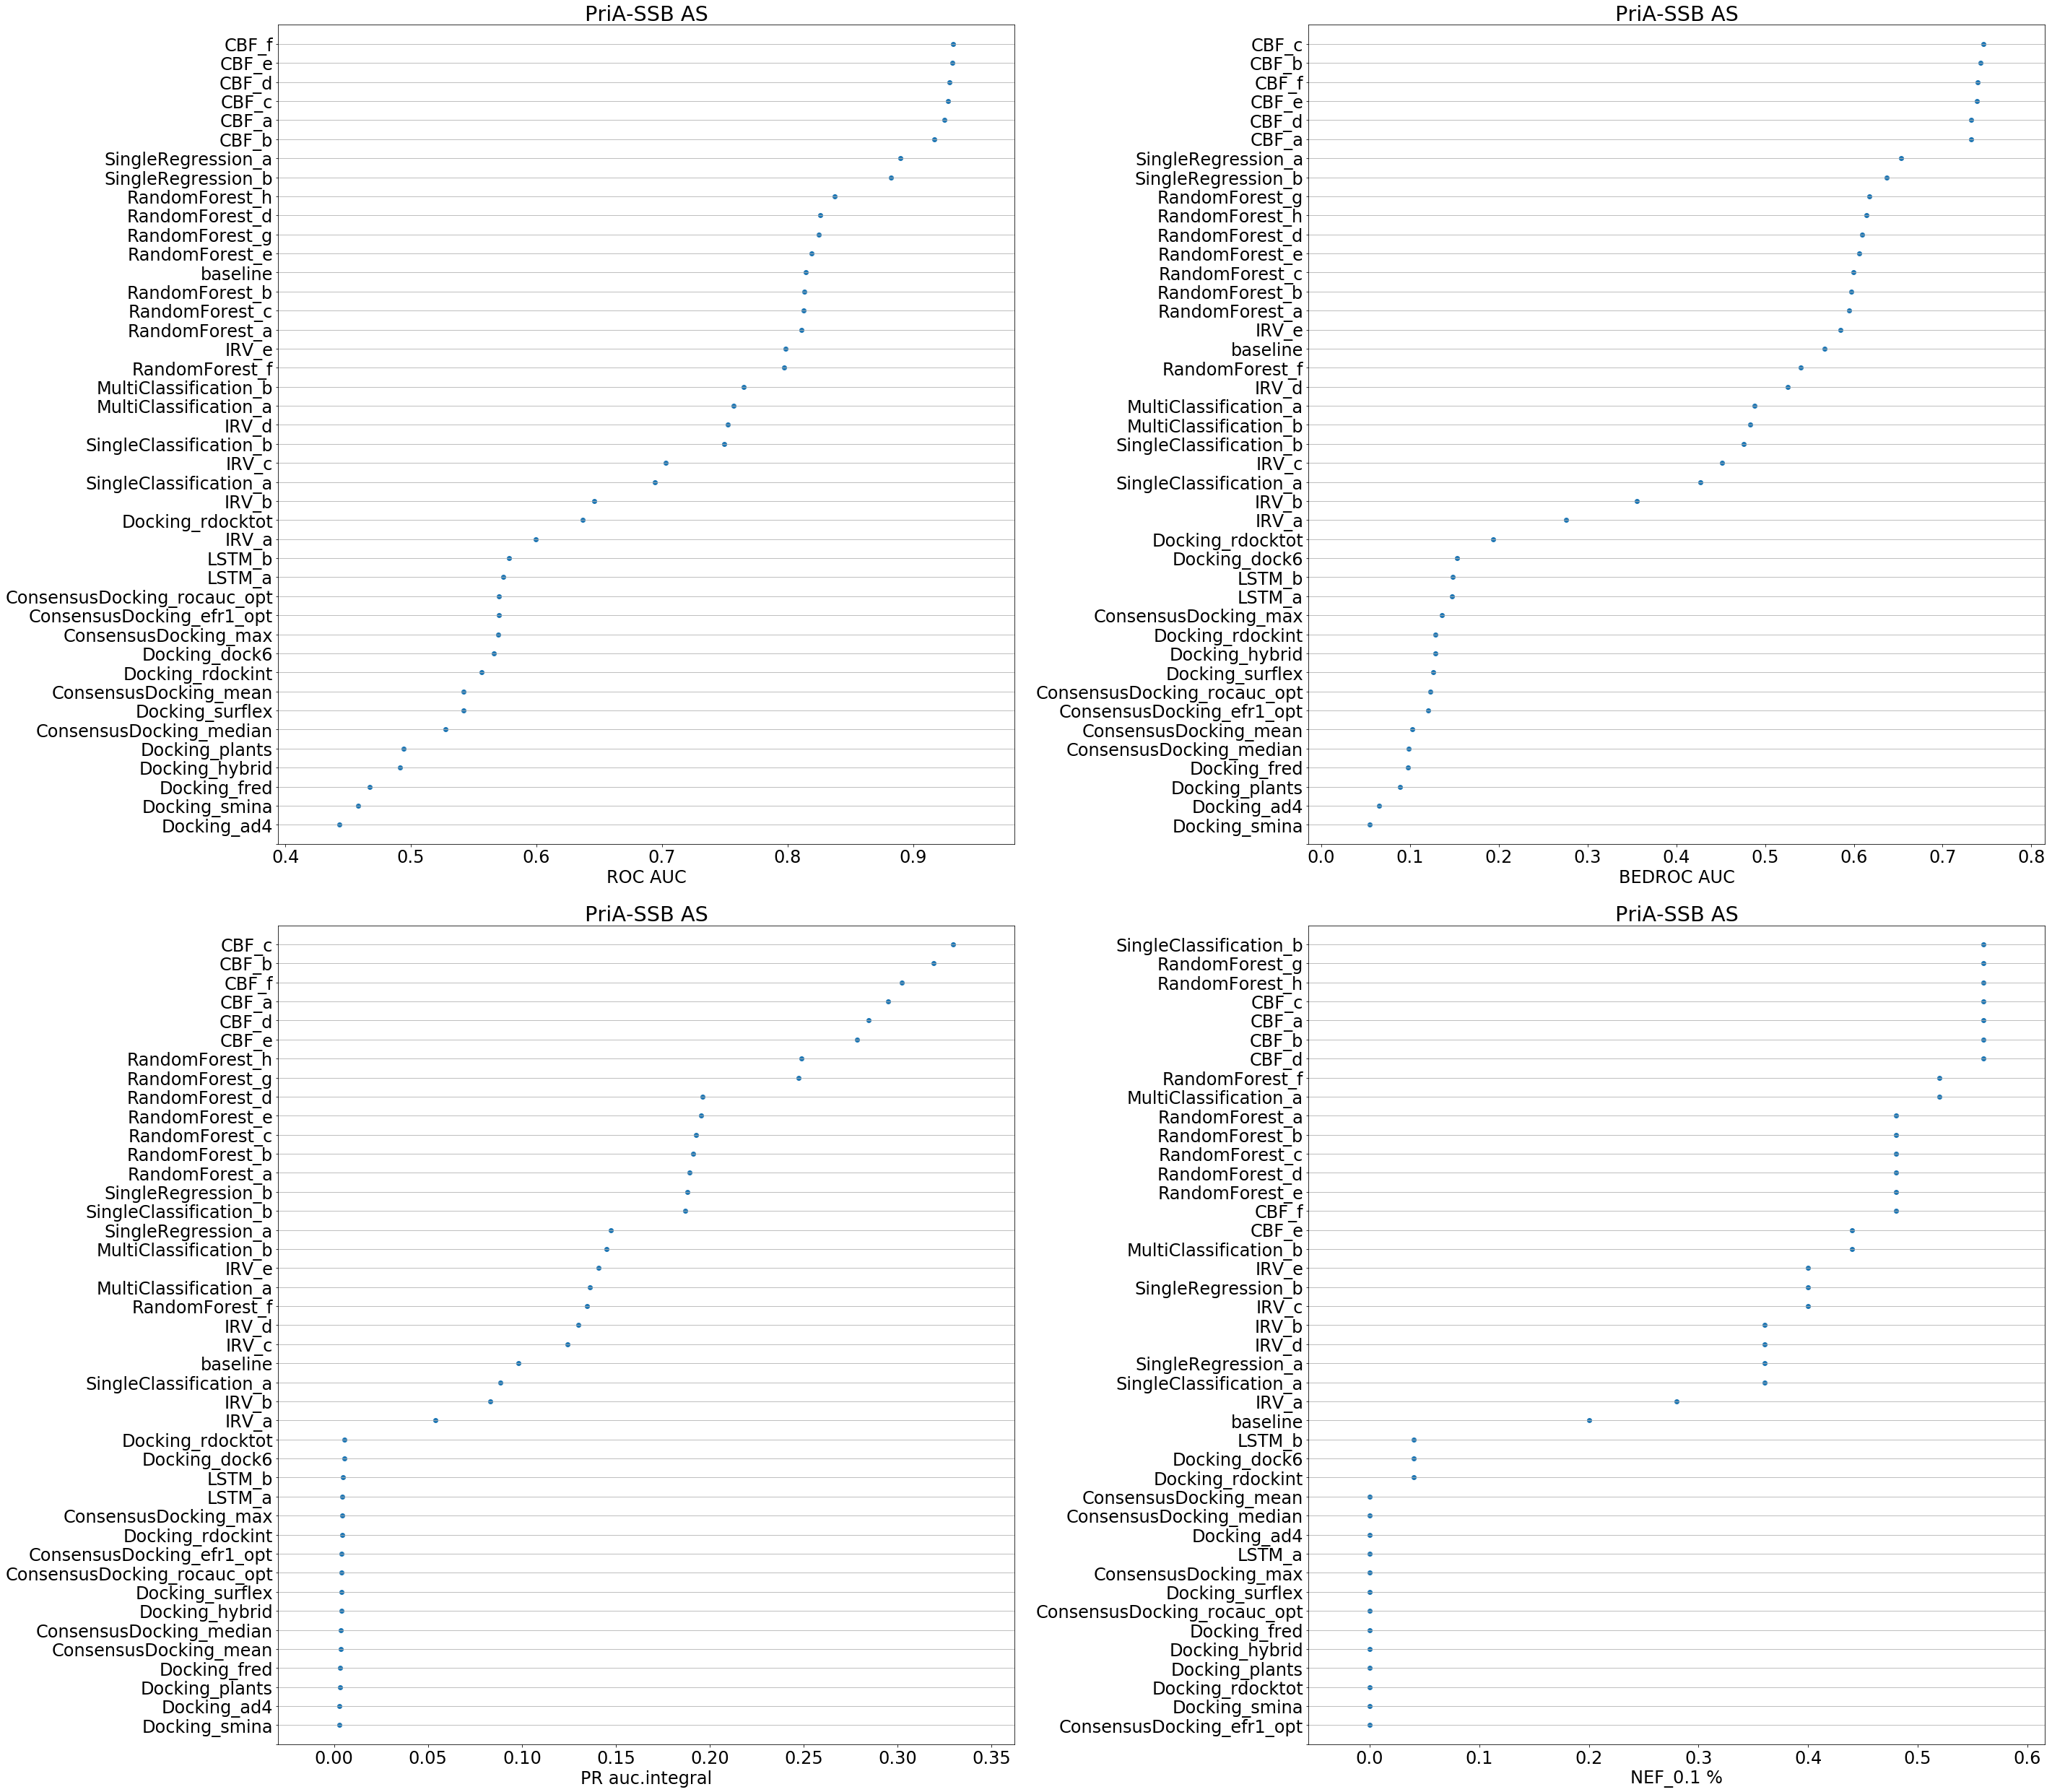

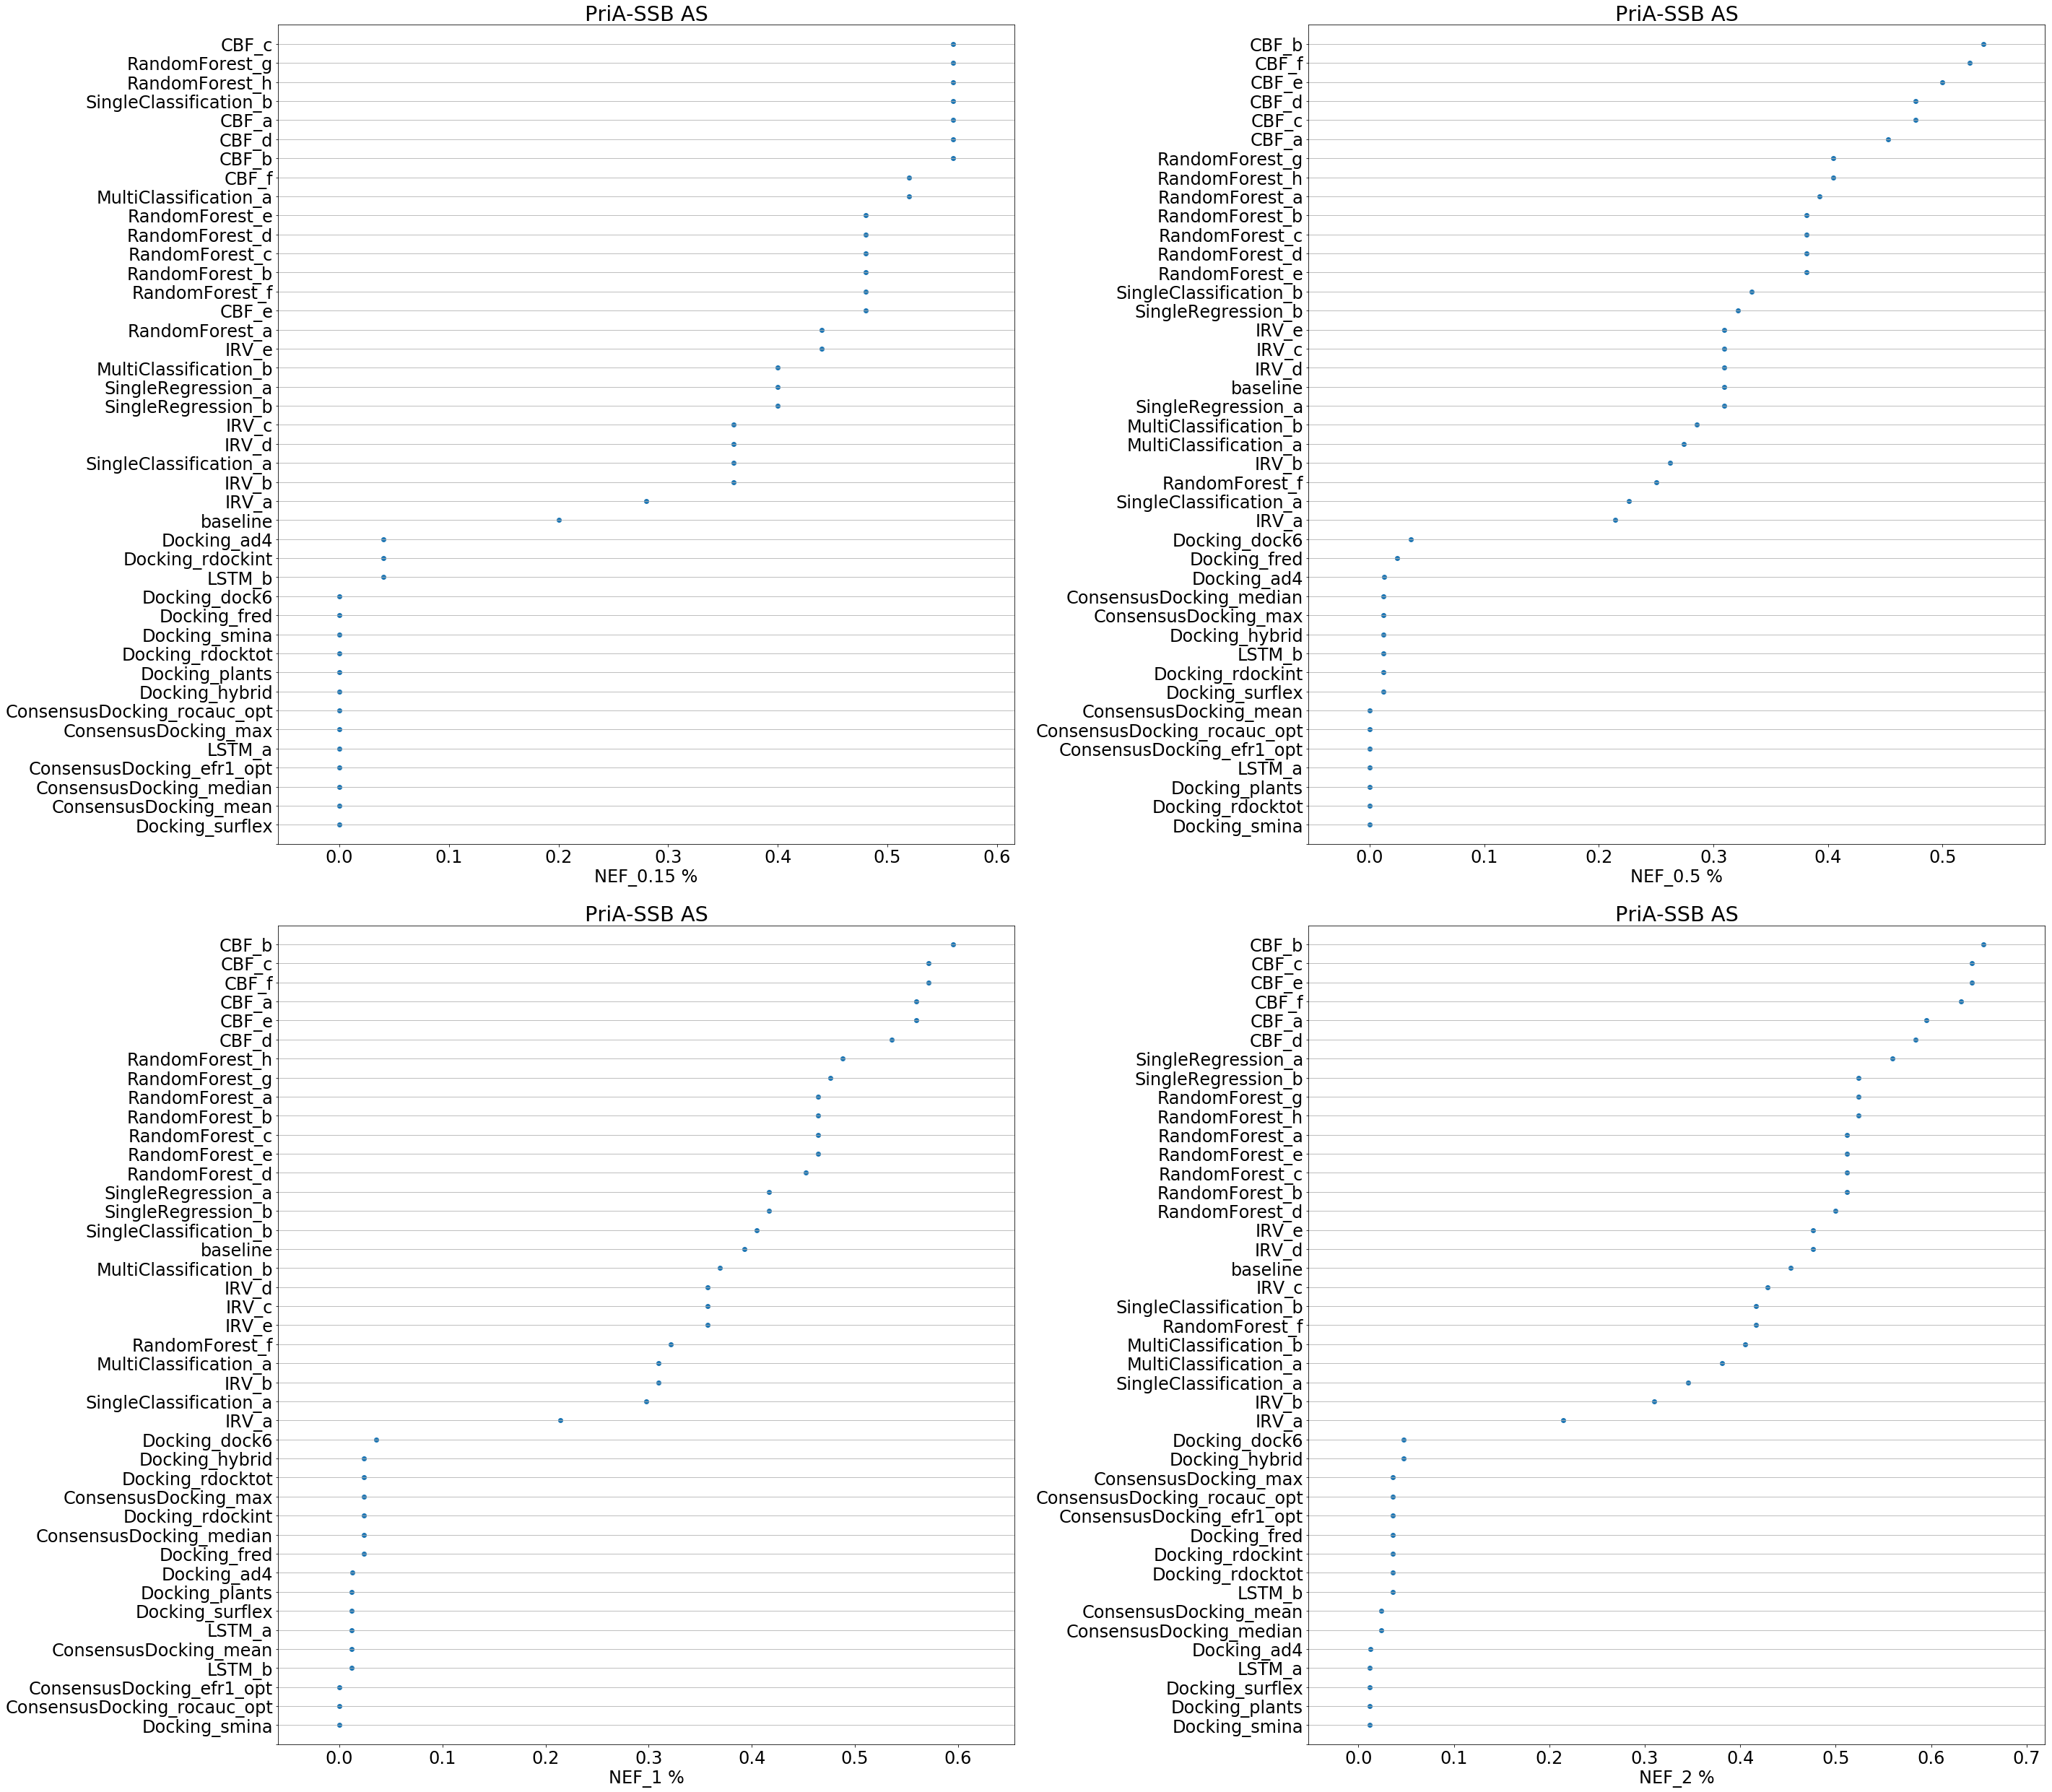

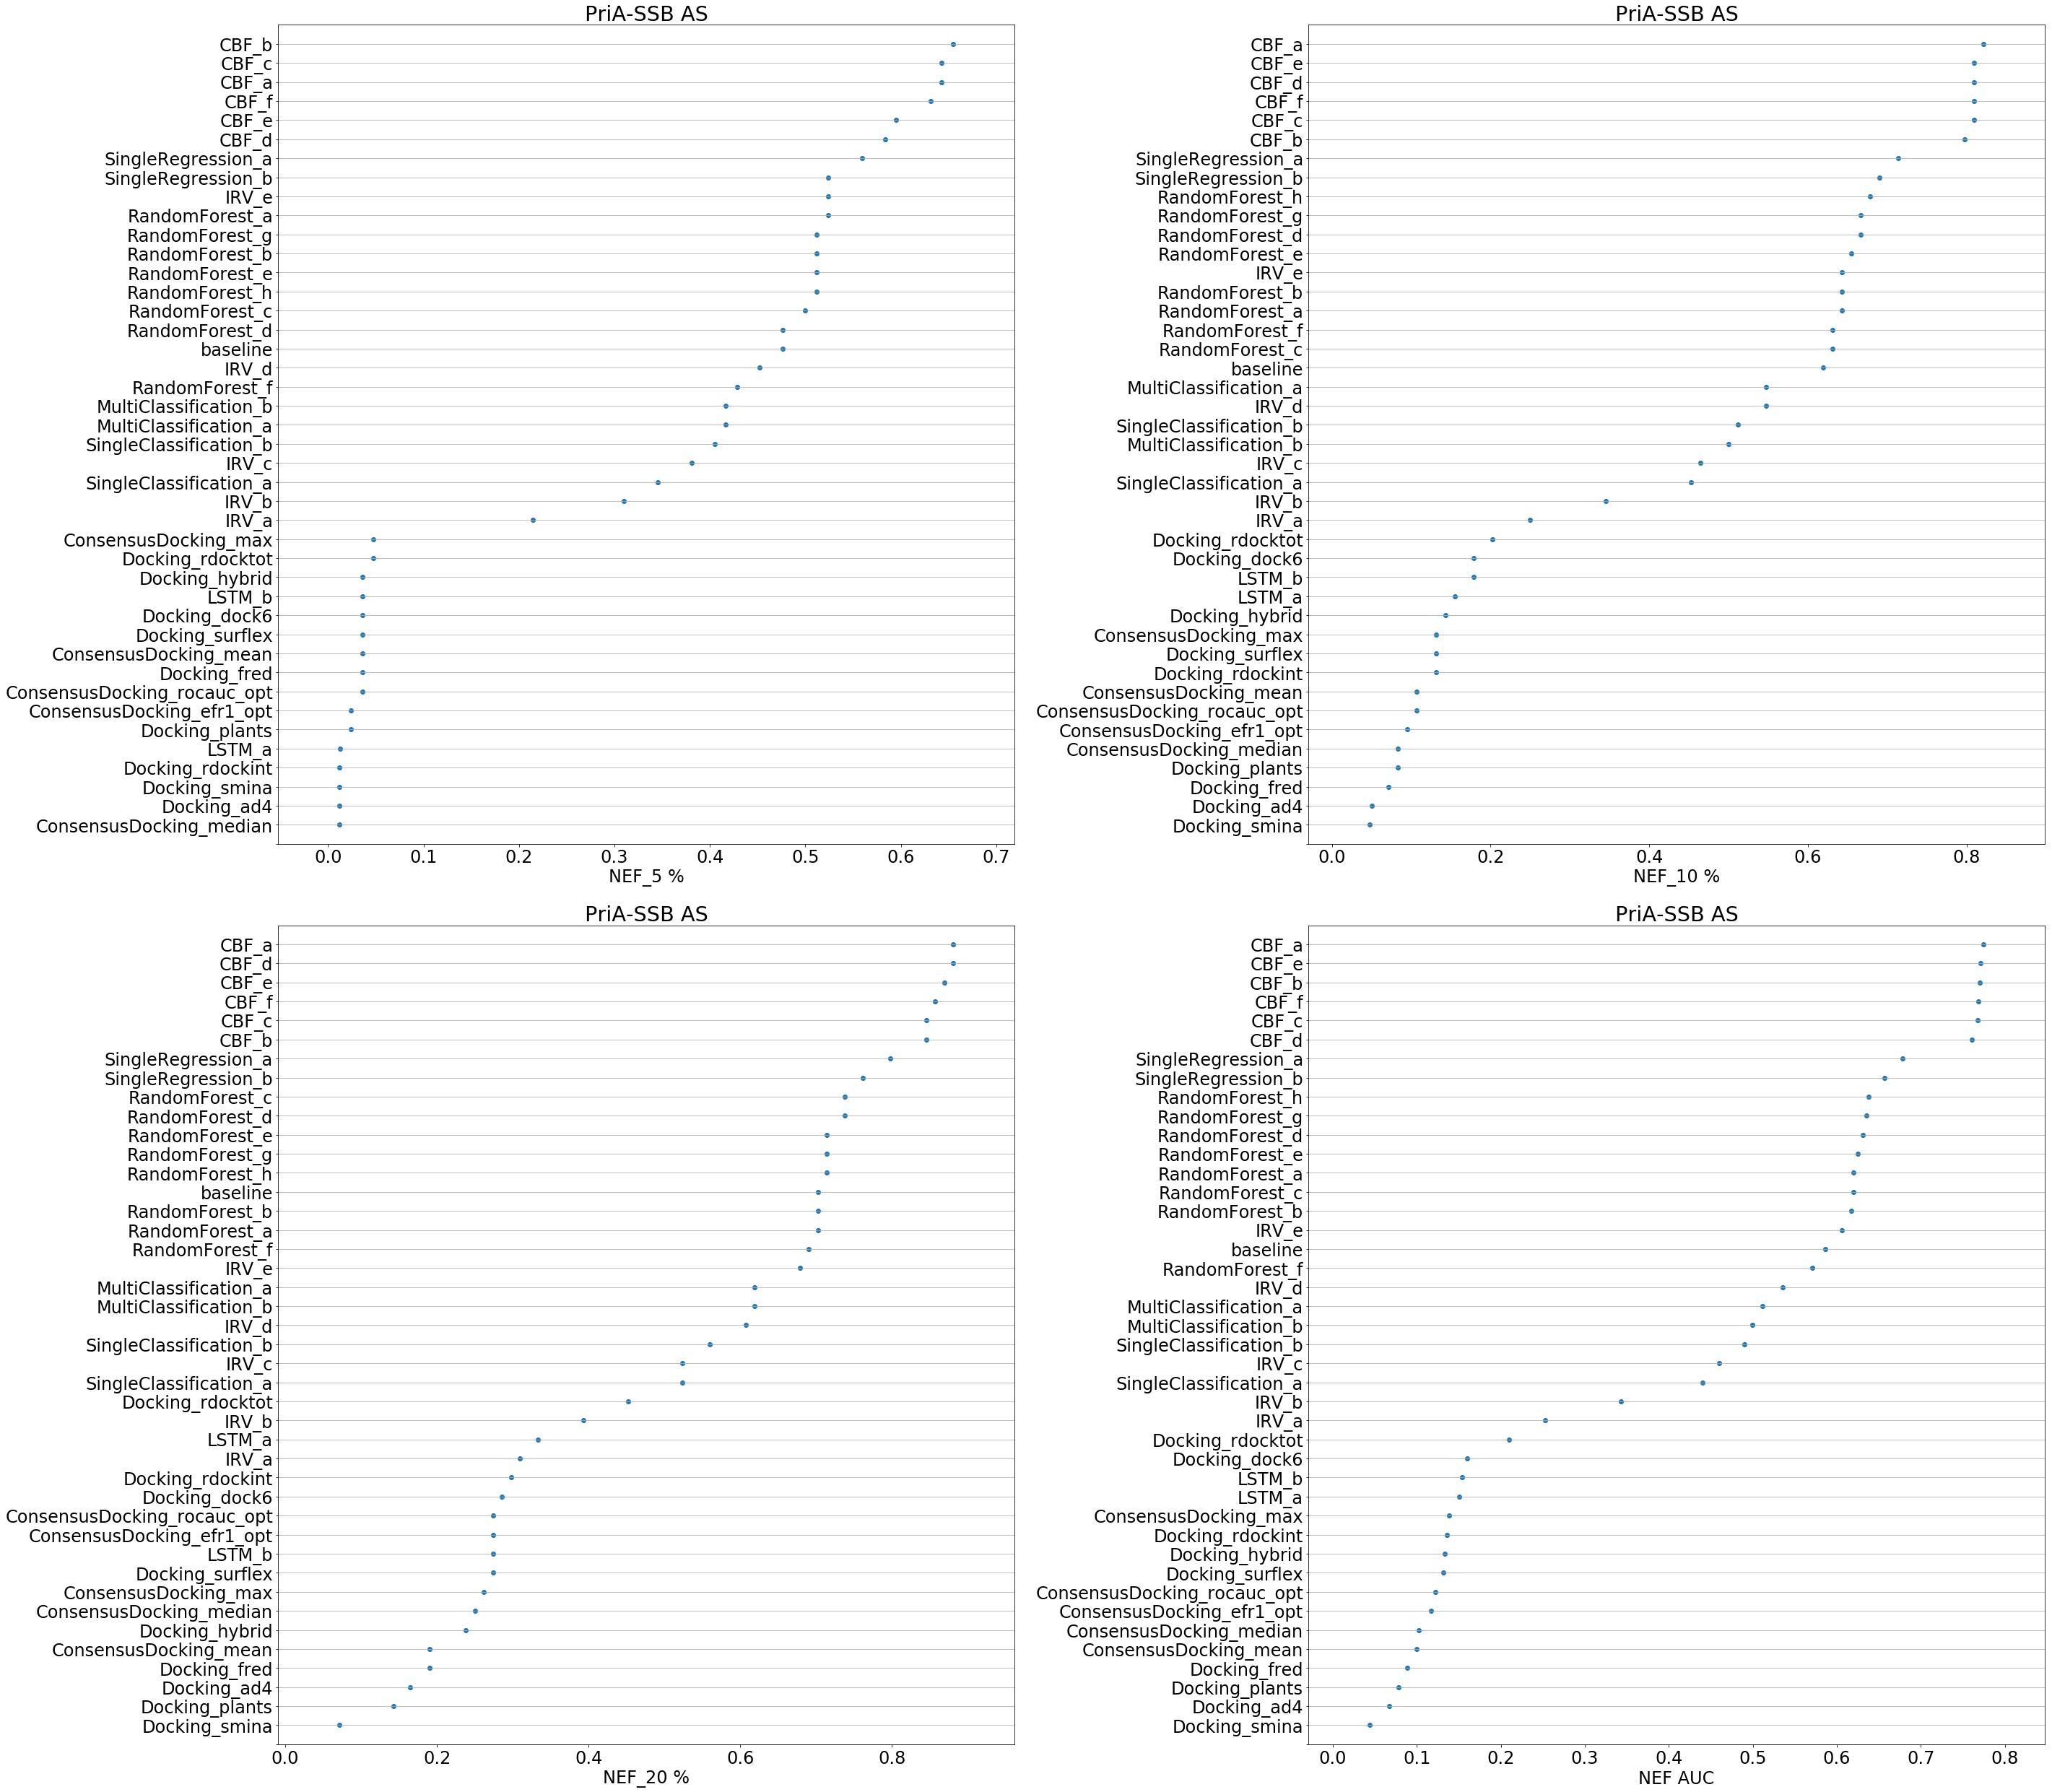

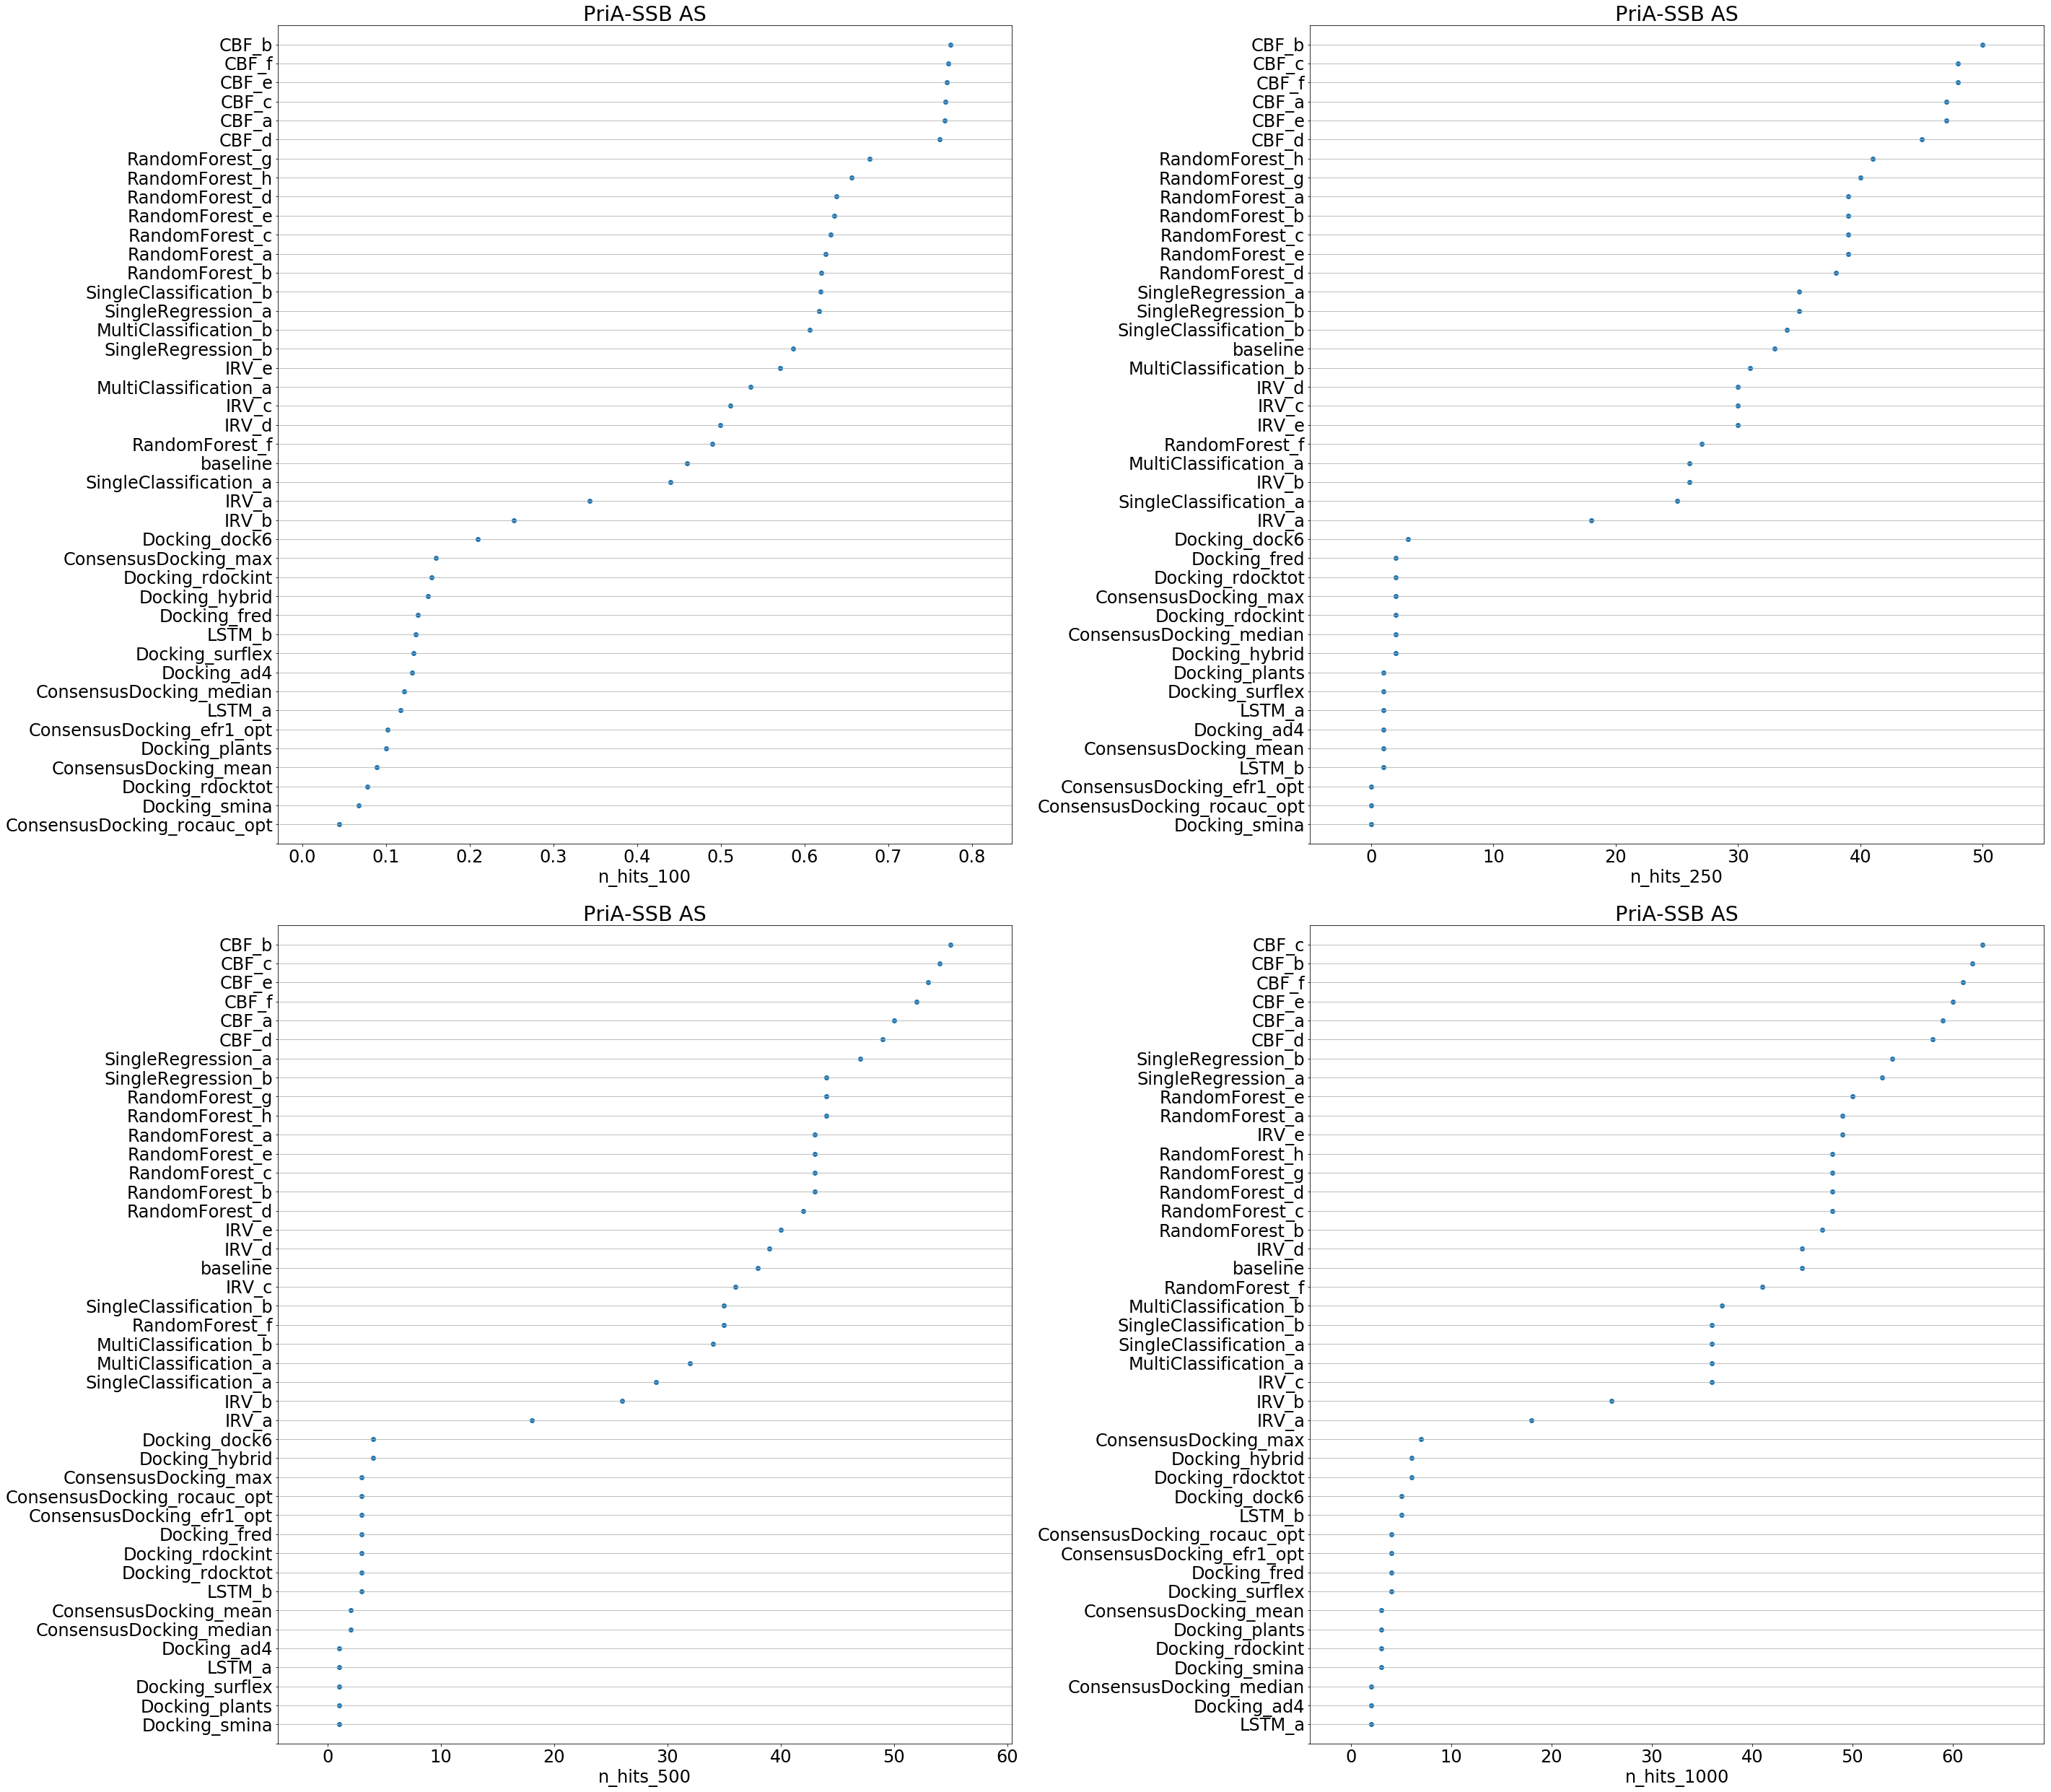

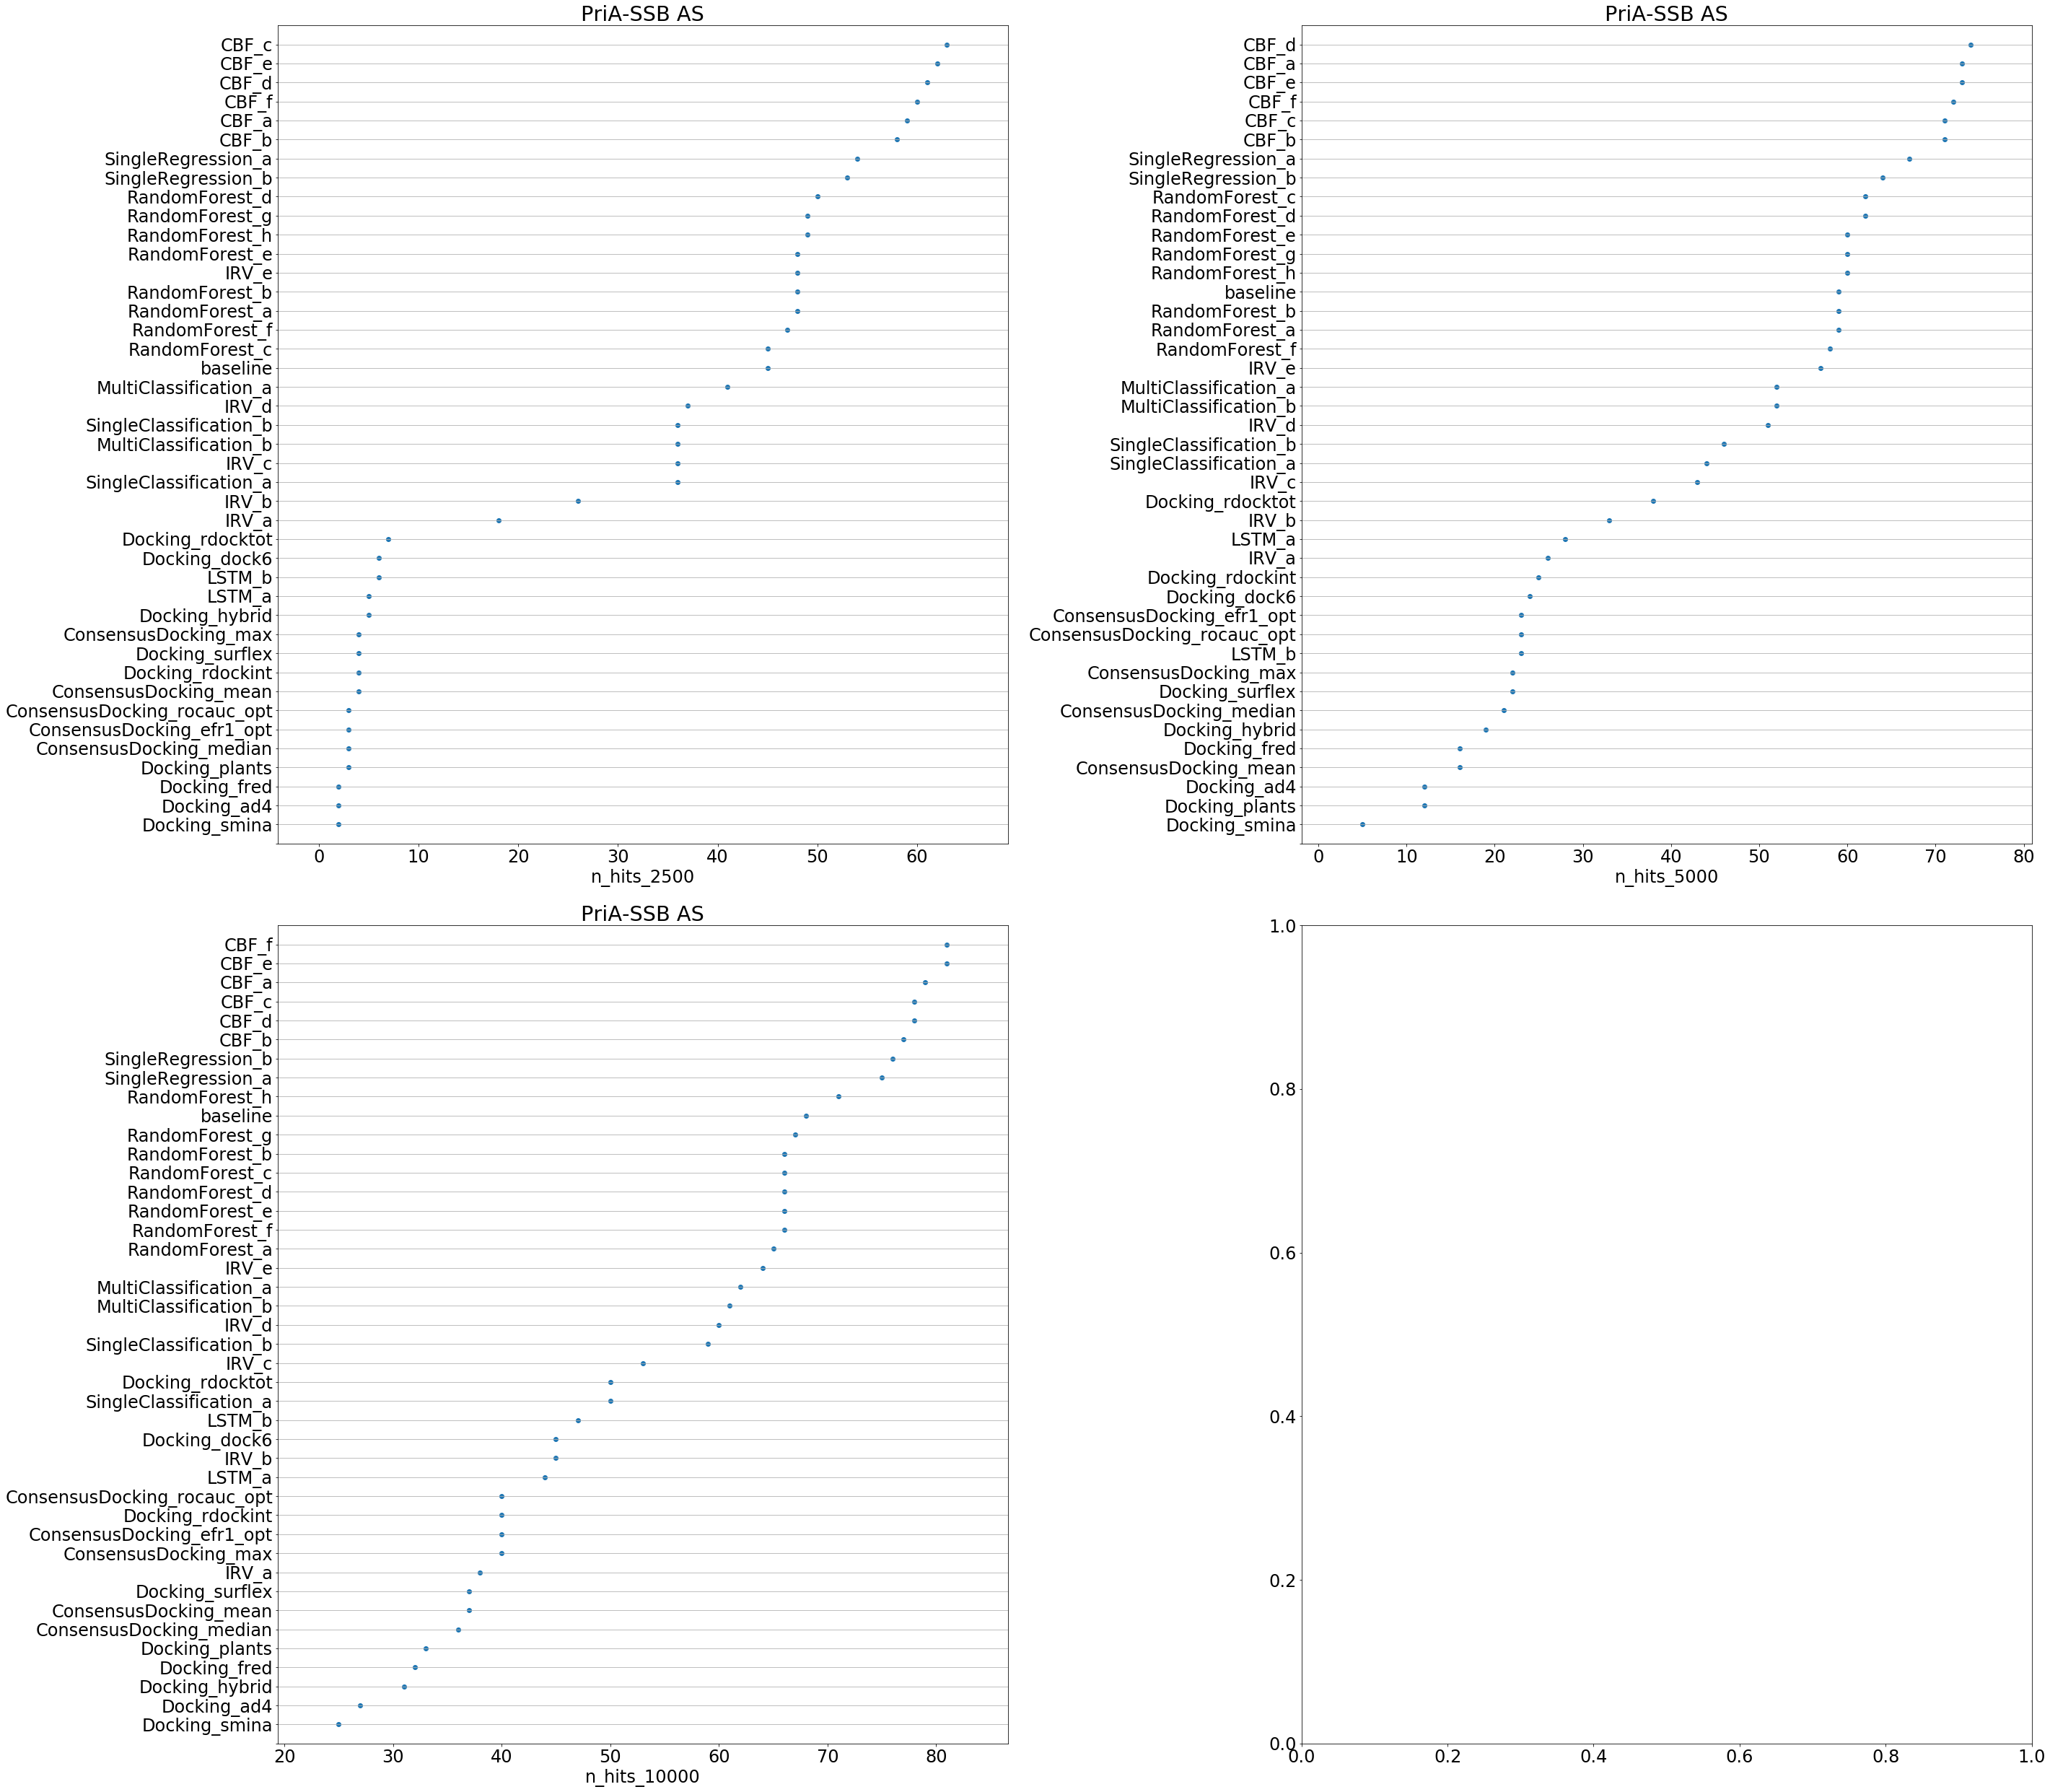

In [12]:
matplotlib.rcParams.update({'font.size': 24})
plot_metric_grid(gather_df, './cv_ps_figures/ps_metric_plots_complete/', figsize=(40,35))

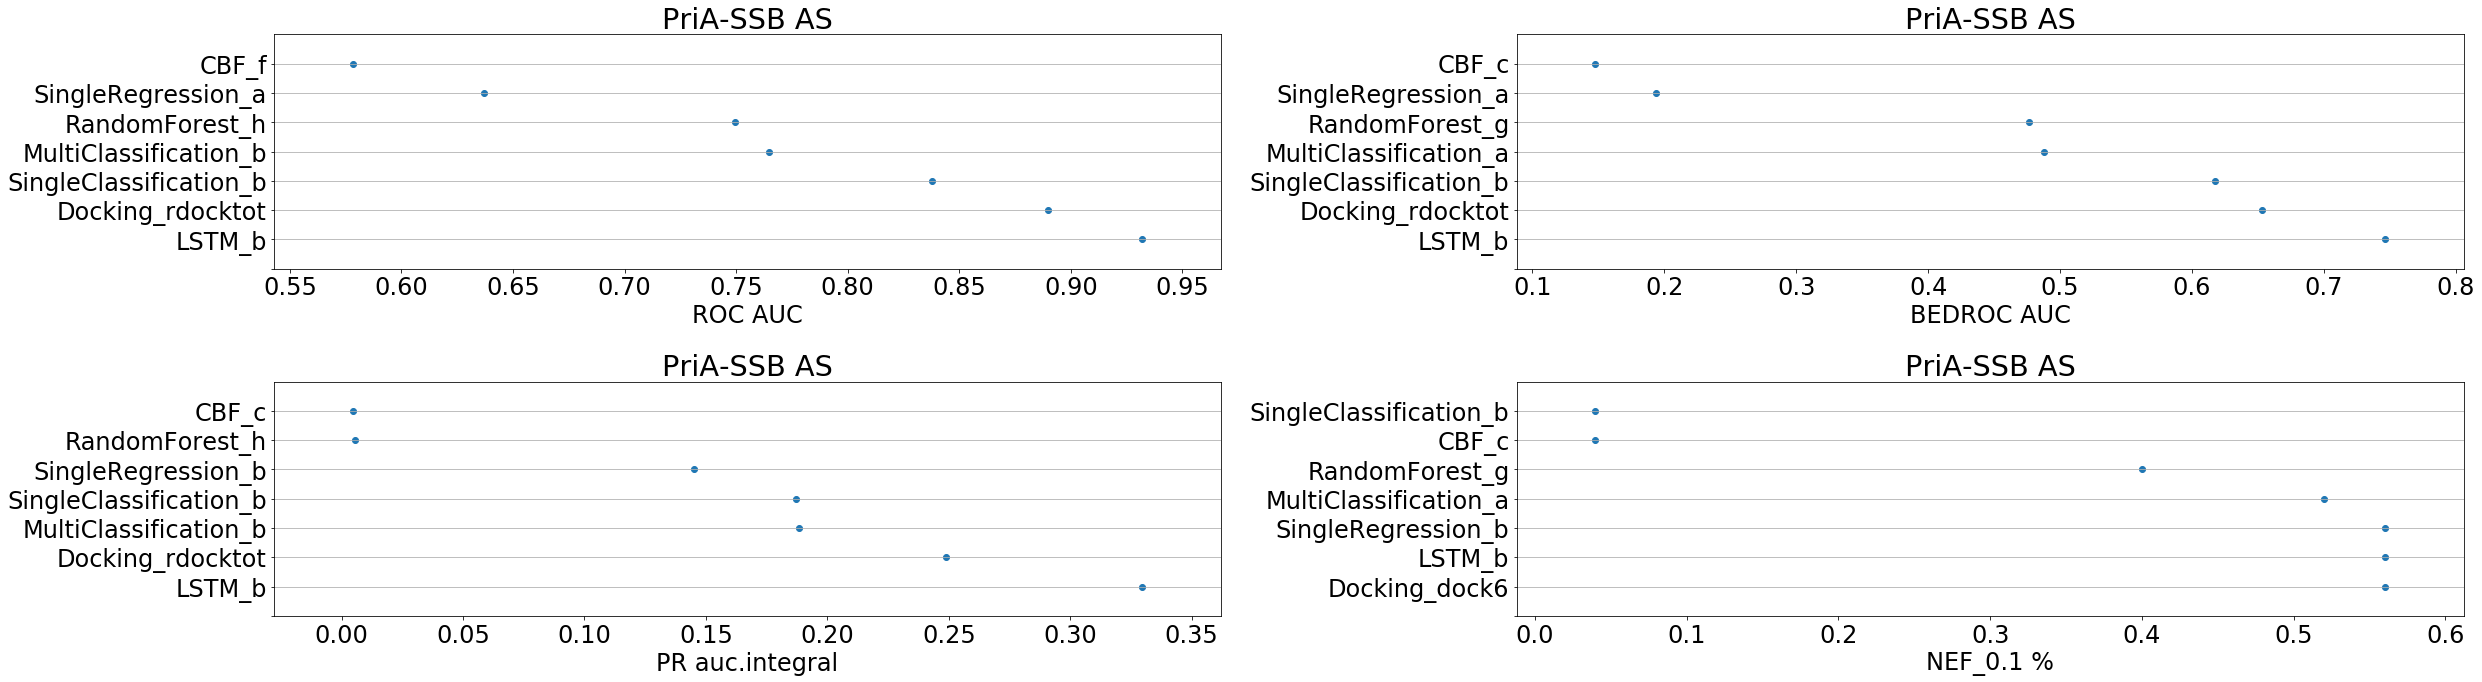

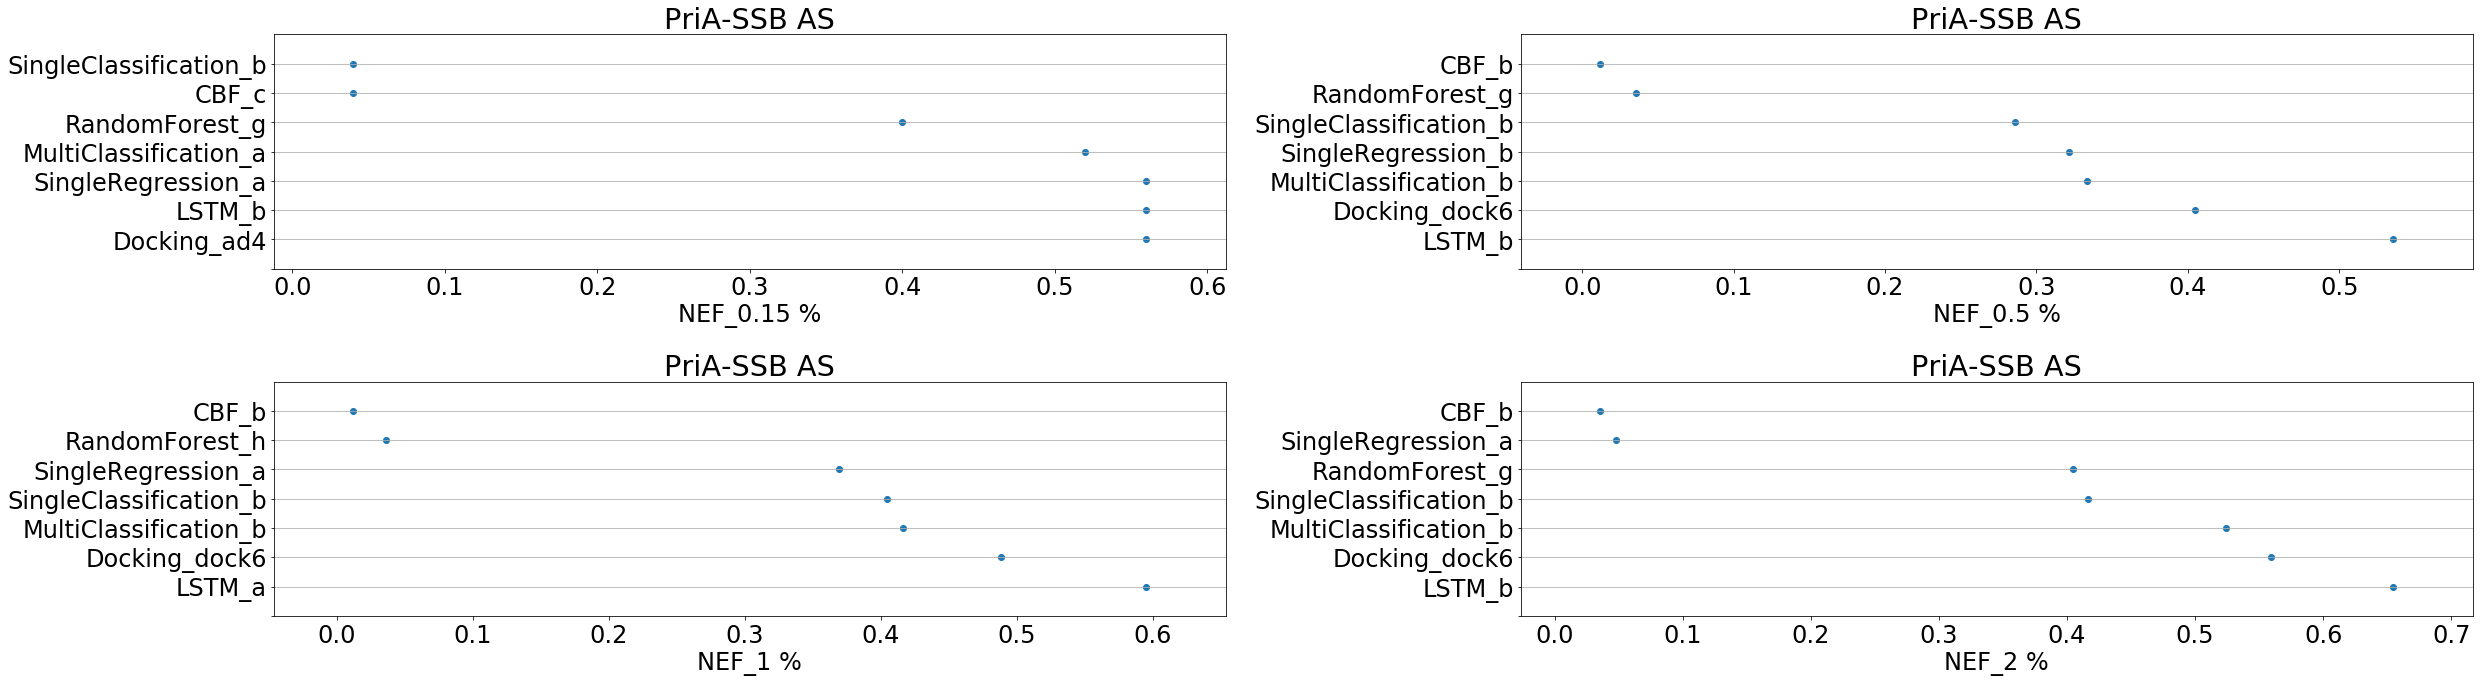

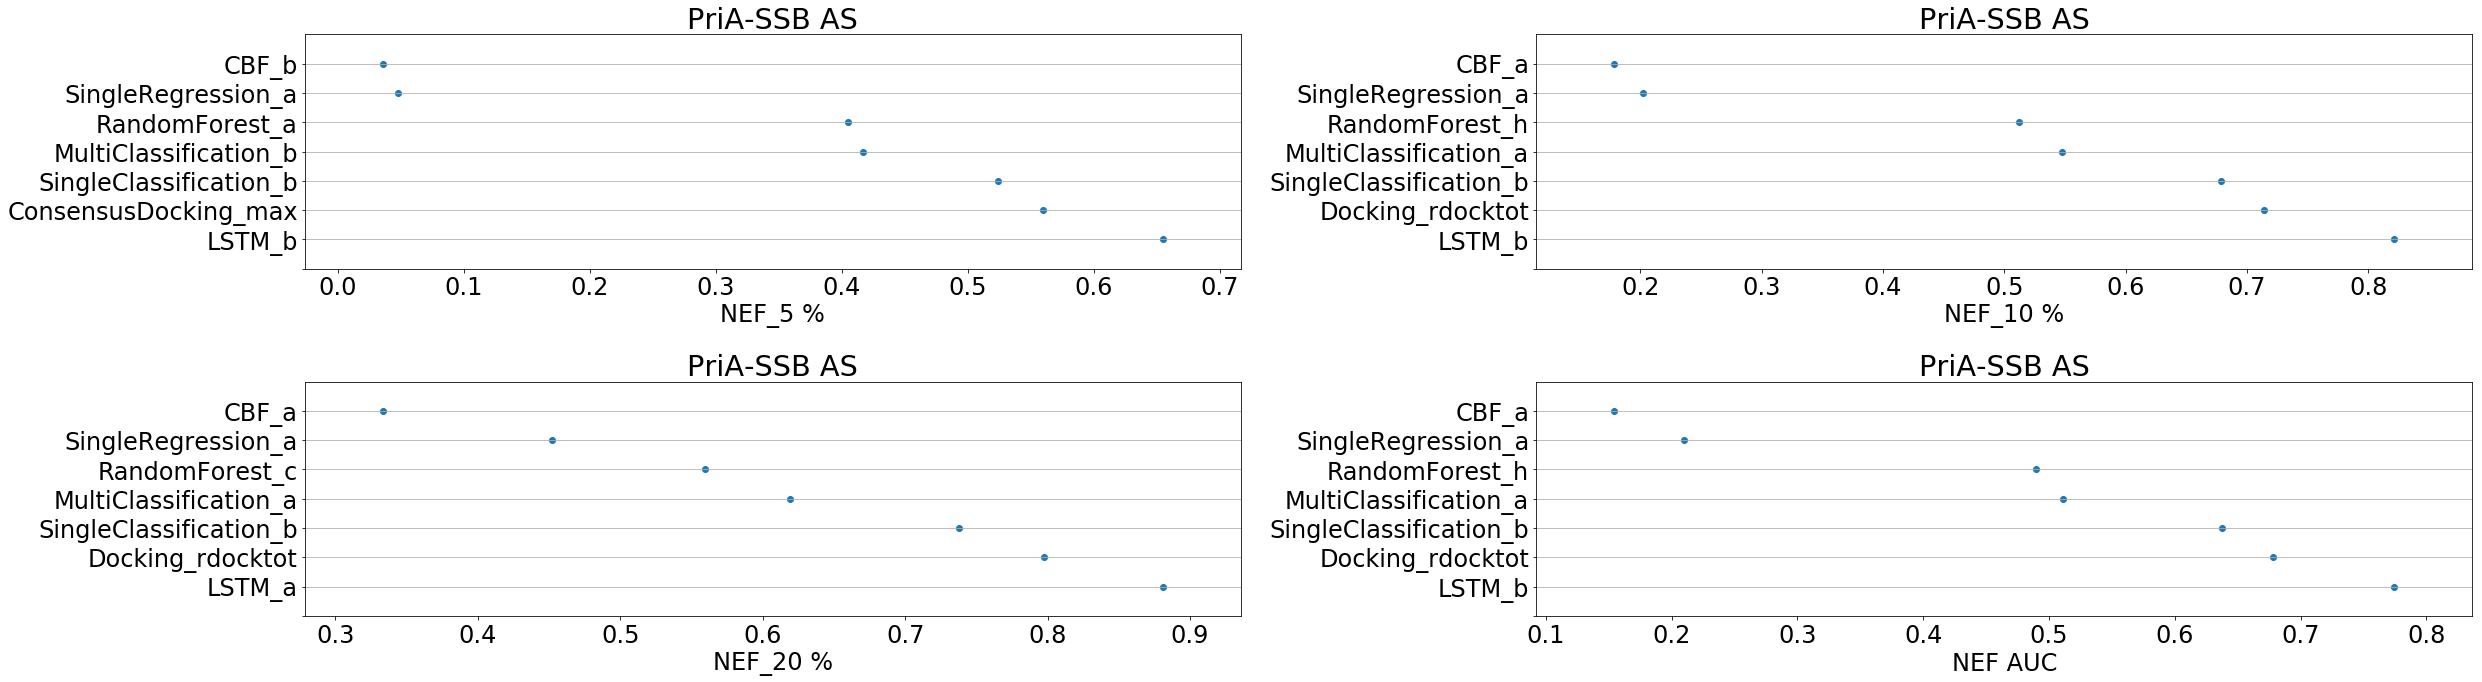

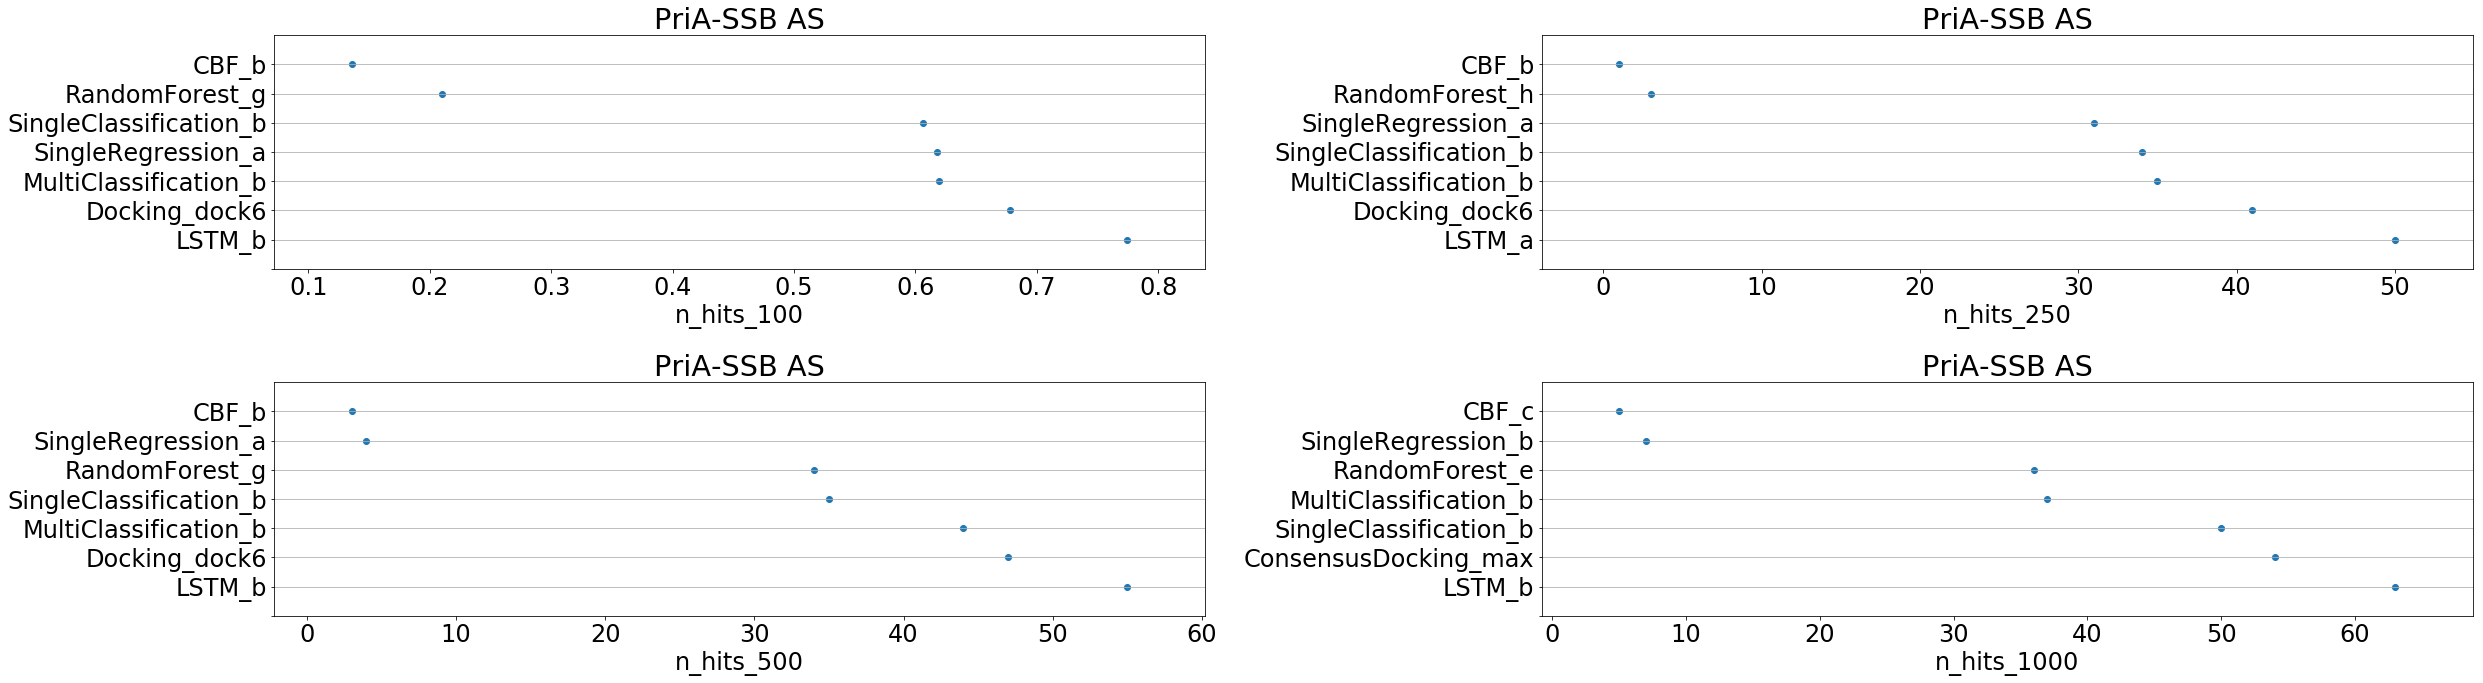

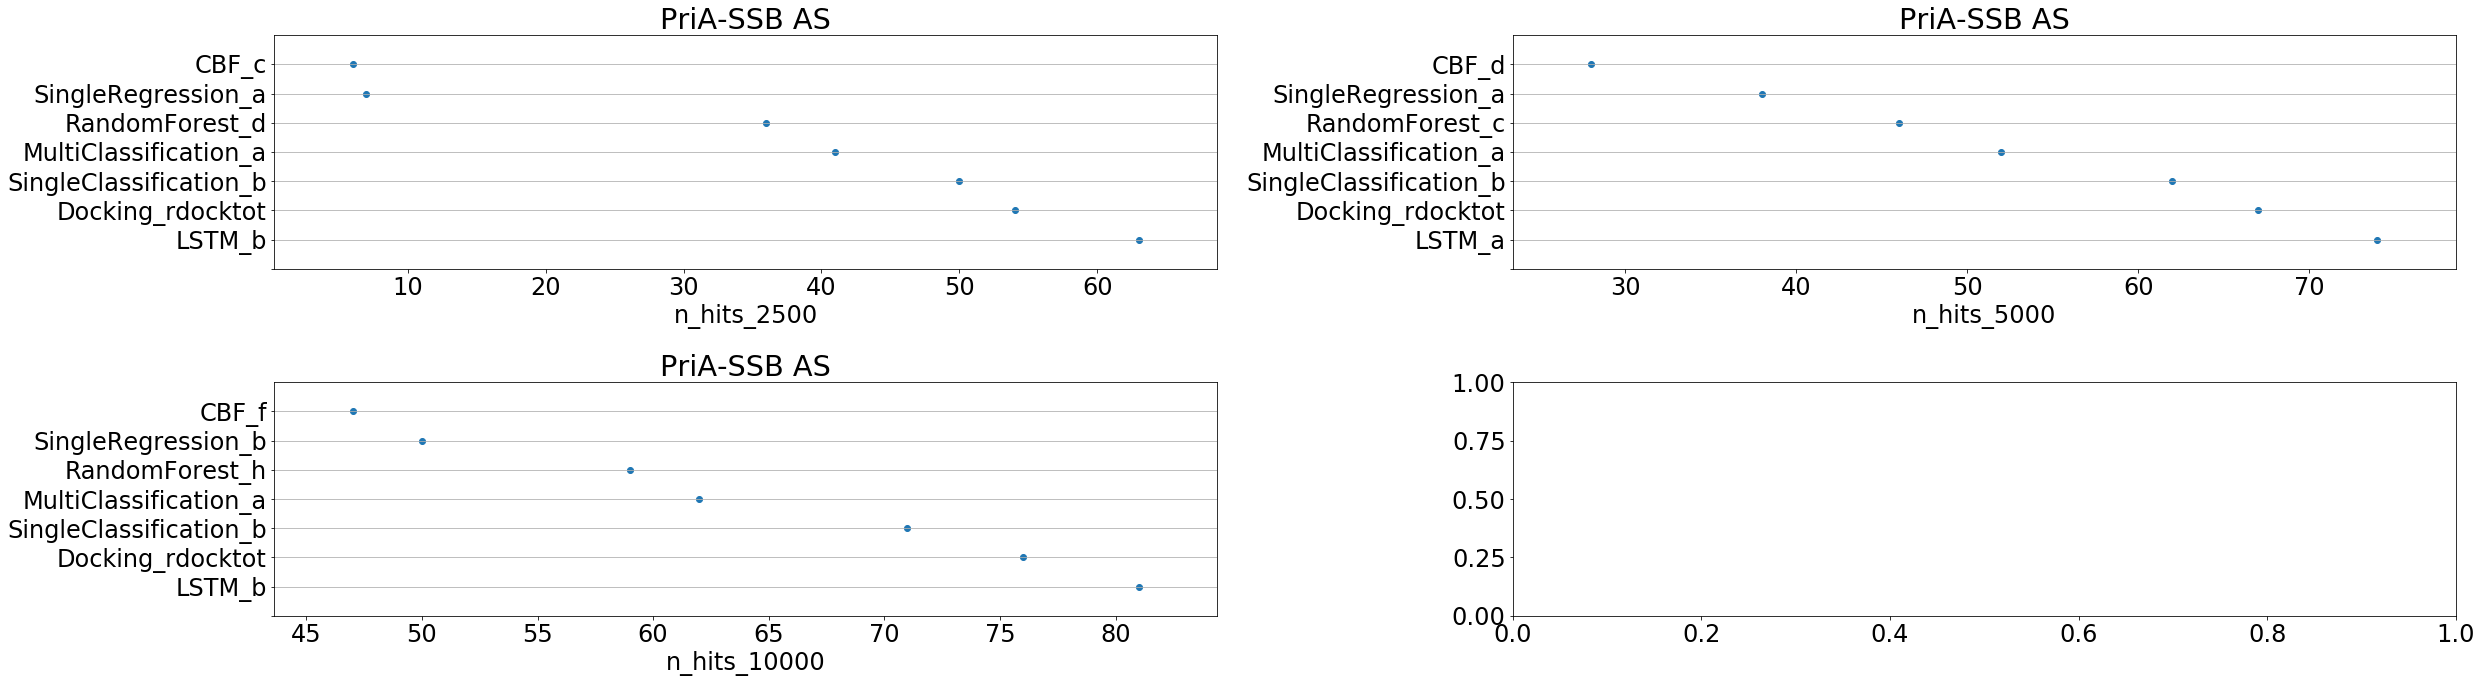

In [13]:
plot_metric_grid(gather_df, './cv_ps_figures/ps_metric_plots_small/', figsize=(35,10), alt=True)